<a href="https://colab.research.google.com/github/bipasha-goswami/GPT-based-deep-learning/blob/main/Restaurant_SentimentAnalysis__BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bipasha Goswami \\
Advisor: Gary Hatfield \\
April 26, 2023

# **MATH 4997W - Restaurant Recommendation and Sentiment Analysis with BERT**


---



## Introduction

In this project, we will be exploring the Yelp dataset, which contains a vast collection of reviews for different businesses, including restaurants. Our objective is to develop a sentiment analysis model that can accurately predict the sentiment of restaurant reviews, thereby enabling restaurant owners to identify areas for improvement and enhance customer satisfaction.



> Part I: Sentiment Analysis of the Restaurant Reviews from YELP Dataset

>> In Part I, we will start by performing an exploratory data analysis (EDA) on the Yelp dataset. We will analyze the distribution of the reviews, their lengths, and other important features that will help us gain insights into the dataset's structure and content. We will also perform some data preprocessing steps, including cleaning and tokenization, to prepare the data for model training. \\
Furthermore, we will evaluate the performance of our BERT model using metrics such as accuracy, precision, recall, and F1-score, and also perform some data visualization to gain insights into the sentiment distribution of the Yelp reviews. \\


> Part II: Converting Yelp Reviews into Sentiment Scores with BERT

>> We will be using Bidirectional Encoder Representations from Transformers (BERT) to convert Yelp reviews into sentiment scores. BERT is a powerful pre-trained language model that can accurately capture the contextual meaning of text. We will fine-tune BERT on the Yelp dataset, and use it to predict the sentiment of restaurant reviews.


> Part III: Restaurant Recommendation

>> We will use the sentiment scores generated in Part II to develop a restaurant recommendation system. We will use collaborative filtering techniques to recommend restaurants to users based on their past ratings and reviews. Additionally, we will incorporate the geographical location of the restaurants to recommend restaurants based on the user's location and recommend the highest-rated restaurants in their vicinity. \\
To accomplish this, we will use techniques such as k-means clustering and geospatial analysis to group restaurants based on their location and generate recommendations based on the user's proximity to those groups.

> Glossary





<a name="cell-id"></a>

# **Part I**

This is the cell I'm linking to




# **Sentiment Analysis** of the **Restaurant Reviews** from **YELP** Dataset


## **BERT**

### The two datasets (**review** and **business**) that we need from **YELP** dataset can be found <a href="https://www.yelp.com/dataset" target="_blank">here</a>

#### Install **Transformers** 

In [ ]:
#@title
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.0 MB/s eta 0:00:00


#### Install **langdetect** 

In [ ]:
#@title
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 32.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=81d508e270010f50937b1658139c81e1e7a6b7ebc8724da11e7eebd660e039dd
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
#@title
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


#### Importing most of the libraries 

In [ ]:
#@title
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
#@title
!pip install keras_preprocessing==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
#@title
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
import matplotlib.pyplot as plt
from textwrap import wrap
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,precision_score, recall_score

import re
import spacy
sp = spacy.load('en_core_web_sm')

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import transformers
from transformers import BertModel, BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader,TensorDataset, RandomSampler, SequentialSampler
import torch.nn as nn  
import torch.nn.functional as F  
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

import time 
import datetime

import tensorflow as tf

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid',palette='muted',font_scale=1.2)
color_palette=['#01BEFE','#FFDD00','#FF7D00','#FF006D','#ADFF02','#8F00FF']
sns.set_palette(sns.color_palette(color_palette))

rcParams['figure.figsize']= 10,5

seed=42
np.random.seed(seed)
torch.manual_seed(seed)

import sys
import os
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### **Read** the **reviews** dataset. As it is a **very heavy** one, let's use only the first 10,000 rows and **reduce** the **memory usage**

In [ ]:
#@title
df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_review.json', nrows=10000, lines=True)

In [ ]:
#@title
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
#@title
df.shape

(10000, 9)

#### **Drop the columns** that we **won't be needing**

In [ ]:
#@title
cols_to_drop = ['review_id', 'user_id', 'useful', 'funny', 'cool', 'date'] 
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
#@title
df.head()

,business_id,stars,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is..."
1,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...
2,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...
3,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo..."
4,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...


#### **Importing** the **business** dataset

In [ ]:
#@title
df1 = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_business.json', lines=True)

In [ ]:
#@title
df1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
#@title
df1.shape

(150346, 14)

#### We **only** want to analyze the **restaurant** category from the **business** dataset

In [ ]:
#@title
df1 = df1[df1['categories'].notnull()]
df_rest = df1[df1['categories'].str.contains('Restaurant')]

In [ ]:
#@title
df_rest = df_rest[['business_id', 'name', 'categories']]

In [ ]:
#@title
df_rest.head()

,business_id,name,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,"Pubs, Restaurants, Italian, Bars, American (Tr..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,"Vietnamese, Food, Restaurants, Food Trucks"


In [ ]:
#@title
df_rest.shape

(52286, 3)

#### We want to **merge** the two datasets to analyse the **restaurant reviews**. "**business_id**" is the **common** columm of the two datasets

In [ ]:
#@title
# business_id is tne common columm of the two datasets
df_merged = df.merge(df_rest, how='inner', on='business_id')

In [ ]:
#@title
# del df, df_rest

In [ ]:
#@title
df_merged.head()

,business_id,stars,text,name,categories
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,XQfwVwDr-v0ZS3_CbbE5Xw,2,This is the second time we tried turning point...,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B..."
2,XQfwVwDr-v0ZS3_CbbE5Xw,4,The place is cute and the staff was very frien...,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B..."
3,XQfwVwDr-v0ZS3_CbbE5Xw,3,We came on a Saturday morning after waiting a ...,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B..."
4,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,Kettle Restaurant,"Restaurants, Breakfast & Brunch"


#### **Rename** the **text column** and **remove** the **"business_id"** column because it **isn't necessary anymore**

In [ ]:
#@title
# Rename the text column and remove the "business_id" column because it isn't necessary anymore
df_merged.rename(columns={'text':'restaurant_reviews'}, inplace=True)
df_merged.drop('business_id', axis=1, inplace=True)

In [ ]:
#@title
df_merged.shape

(7105, 4)

#### We will **only** analyse the reviews **written** in **English**

In [ ]:
#@title
from langdetect import detect

In [ ]:
#@title
df_merged['detect'] = df_merged['restaurant_reviews'].apply(detect)
df_merged = df_merged[df_merged['detect'] == 'en'].reset_index(drop=True)

In [ ]:
#@title
# Check if there is NaN values
df_merged.isnull().values.any()

False

#### Return the dataframe with **duplicate** rows **removed**

In [ ]:
#@title
df_merged.drop_duplicates(inplace=True)

#### As **many** of the **3 stars reviews**, most likely, have both **good and bad aspects/feelings**, we will **remove** those reviews so they **won't harm** our sentiment analysis

In [ ]:
#@title
df_merged = df_merged[(df_merged["stars"]!=3)]
df_merged.head(20)

,stars,restaurant_reviews,name,categories,detect
1,2,This is the second time we tried turning point...,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",en
2,4,The place is cute and the staff was very frien...,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",en
5,5,"Wow! Yummy, different, delicious. Our favo...",Zaika,"Halal, Pakistani, Restaurants, Indian",en
6,2,Dine-in gets 2 stars. Disappointing service & ...,Zaika,"Halal, Pakistani, Restaurants, Indian",en
7,5,After a long hiatus from reviewing I have awak...,Zaika,"Halal, Pakistani, Restaurants, Indian",en
8,5,We've eaten here 3 times and it seems that eac...,Zaika,"Halal, Pakistani, Restaurants, Indian",en
9,5,Came to Philly for a family event but stayed a...,Zaika,"Halal, Pakistani, Restaurants, Indian",en
10,5,A very neat little hole in the wall. Very clea...,Zaika,"Halal, Pakistani, Restaurants, Indian",en
11,4,This place was a great find. I'd say its a 4.5...,Zaika,"Halal, Pakistani, Restaurants, Indian",en
12,4,I've been here several times. The price is rea...,Zaika,"Halal, Pakistani, Restaurants, Indian",en


#### **Label** reviews as **positive** - **1** (4 and 5 stars) - or **negative** - **0** (1 and 2 stars) - and after that **remove** the **"stars" column**, it is not needed anymore

In [ ]:
#@title
# label reviews as positive or negative and after that remove the "stars" column, it is not needed anymore
 
df_merged.loc[df_merged['stars'] < 3, 'sentiment'] = 0 
df_merged.loc[df_merged['stars'] > 3, 'sentiment'] = 1
df_merged.drop('stars', axis=1, inplace=True)
df_merged.head(10)

,restaurant_reviews,name,categories,detect,sentiment
1,This is the second time we tried turning point...,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",en,0.0
2,The place is cute and the staff was very frien...,Turning Point of North Wales,"Restaurants, Breakfast & Brunch, Food, Juice B...",en,1.0
5,"Wow! Yummy, different, delicious. Our favo...",Zaika,"Halal, Pakistani, Restaurants, Indian",en,1.0
6,Dine-in gets 2 stars. Disappointing service & ...,Zaika,"Halal, Pakistani, Restaurants, Indian",en,0.0
7,After a long hiatus from reviewing I have awak...,Zaika,"Halal, Pakistani, Restaurants, Indian",en,1.0
8,We've eaten here 3 times and it seems that eac...,Zaika,"Halal, Pakistani, Restaurants, Indian",en,1.0
9,Came to Philly for a family event but stayed a...,Zaika,"Halal, Pakistani, Restaurants, Indian",en,1.0
10,A very neat little hole in the wall. Very clea...,Zaika,"Halal, Pakistani, Restaurants, Indian",en,1.0
11,This place was a great find. I'd say its a 4.5...,Zaika,"Halal, Pakistani, Restaurants, Indian",en,1.0
12,I've been here several times. The price is rea...,Zaika,"Halal, Pakistani, Restaurants, Indian",en,1.0


#### Let's see if the dataset is **balanced or not**: **it isn't...**

In [ ]:
#@title
warnings.simplefilter(action='ignore', category=FutureWarning)
# See if the dataset is balanced or not: its isn't...
plt.figure(figsize=(12,8))
grouped = df_merged.sentiment.value_counts().sort_index()


<Figure size 1200x800 with 0 Axes>

In [ ]:
#@title
grouped

0.0    1325
1.0    4875
Name: sentiment, dtype: int64

In [ ]:
#@title
grouped.values

array([1325, 4875])

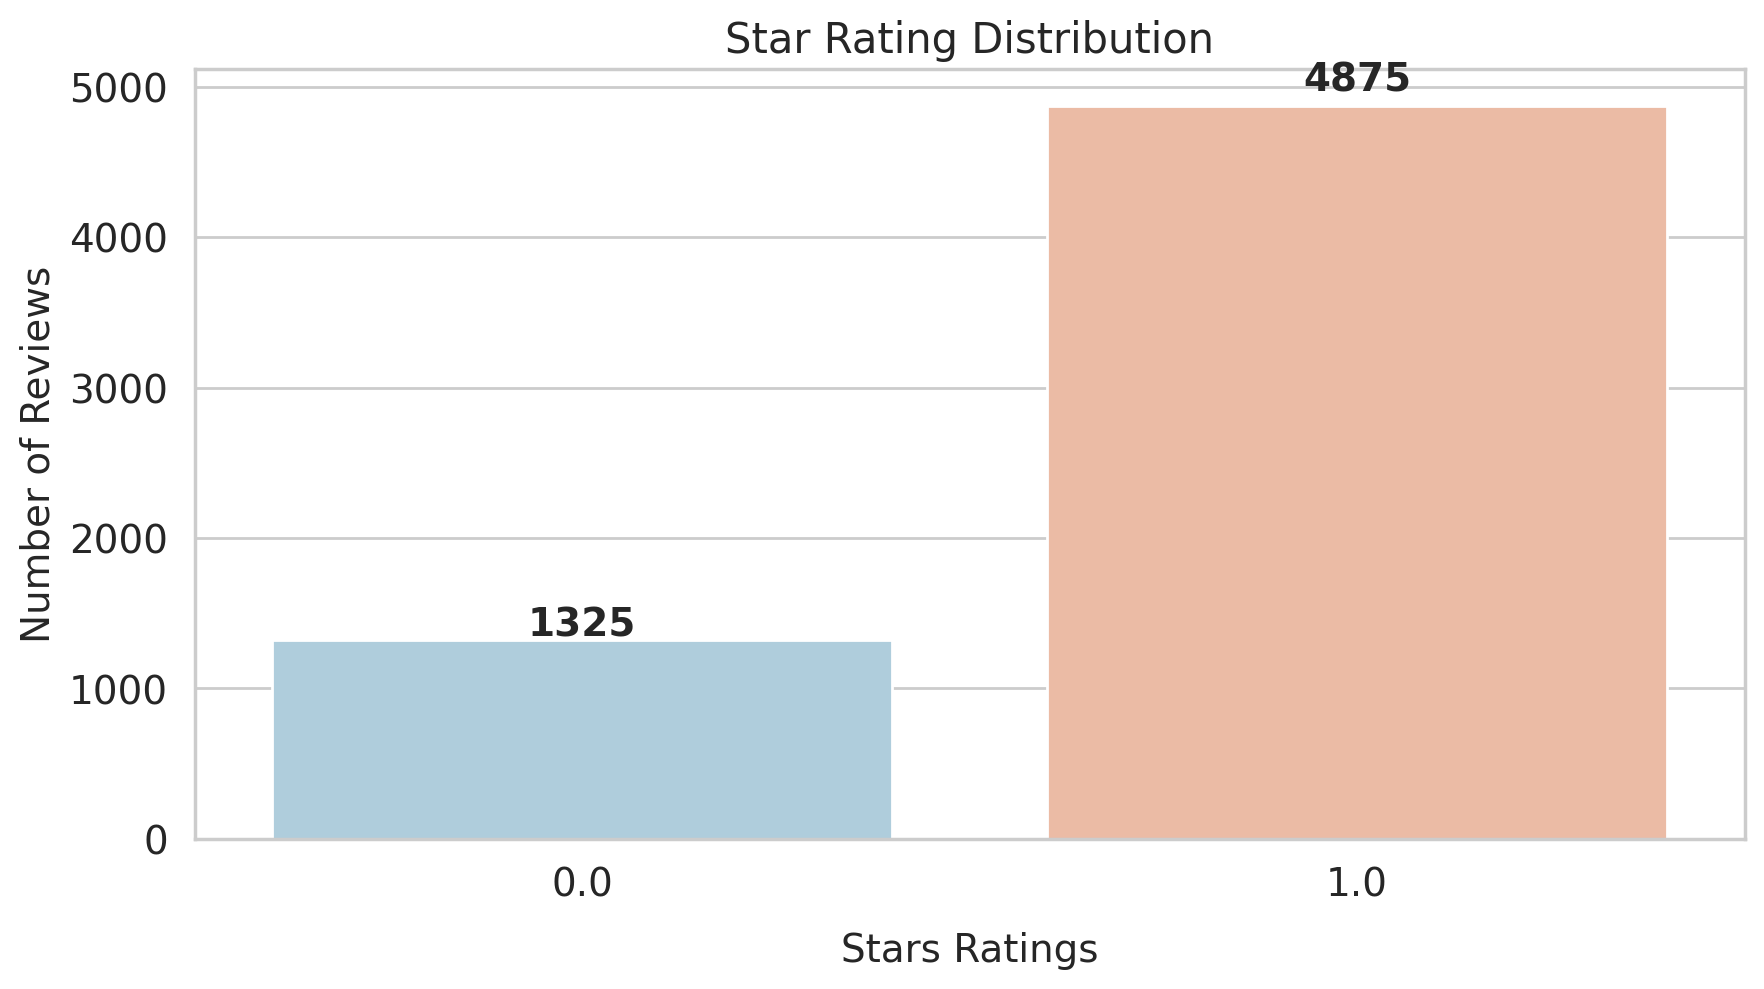

In [ ]:
#@title
sns.barplot(x=grouped.index, y=grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
# palette=sns.color_palette("RdBu_r", len(grouped))
plt.xlabel('Stars Ratings', labelpad=10, fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Star Rating Distribution', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
     plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

#### To deal with **imbalanced** data we chose to **upsample** the **minority class** (negative sentiment - 0)

In [ ]:
#@title
from sklearn.utils import resample

#create two different dataframes: one regarding the majority and the other the minority class 
df_majority = df_merged[(df_merged['sentiment']==1)] 
df_minority = df_merged[(df_merged['sentiment']==0)] 


df_minority_upsampled = resample(df_minority, 
                                 replace=True,   
                                 n_samples= 4643, # to match majority class
                                 random_state=42)  
# Combine majority class with upsampled minority class
df_final = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
#@title
df_final.sentiment.value_counts()

1.0    4875
0.0    4643
Name: sentiment, dtype: int64

#### **Stopwords** with **spaCy**. As **'no'** and **'not'** are **important** words to describe an opinion about a restaurant (e.g. not cheap, not a good service, no napkins available, etc.), we should, at least, **remove** those two words from the **stopwords**. 

- **Note**: using stopwords provides **context**, so when using a **contextual model** like **BERT** one **should usually keep** them to **provide** enough **context information**; however, in this case, when spliting the dataset into train, validation and test sets, we can see that for two of those three sets the **number of tokens** in some reviews (in one of the sets **more than 600** and in the other **more than 700**) **exceeds the maximum length possible** (512), being so we decided to **exclude the stopwords** with the **exception of the two words already mentioned**.

In [ ]:
#@title
sp = spacy.load('en_core_web_sm')
stopwords = sp.Defaults.stop_words

exclude_stopwords = ['no','not']
for word in exclude_stopwords:
    stopwords.remove(word)

#### **User-Defined Function** to **remove non-letters**, convert to **lower case**, **tokenize** with **NLTK** library and **remove** the **spaCy stopwords** from the restaurant reviews:

The steps implemented in the code below are as follows: \\
**Step 1**: Remove any non-alphabetic characters from the review using a regular expression. The re library is used for this task. Any non-letter character is replaced with a space. \\
**Step 2**: Convert the entire review to lower case using the .lower() method. \\
**Step 3**: The review is tokenized into individual words using the word_tokenize function from the nltk library. \\
**Step 4**: The function uses the stopwords list loaded using spacy to filter out any stop words from the tokenized words. A for loop iterates over each word, and a check is performed using spacy's vocab to determine whether the word is a stop word or not. If the word is not a stop word, it is appended to the filtered_sentence list. \\
Finally, the function returns the preprocessed review by joining the filtered_sentence list into a string using a space separator.


In [ ]:
#@title
# The input is a single string (a raw restaurant review), and the output is a single string (a preprocessed restaurant review)

def text_preprocessing( raw_review ):
    # 1. Remove non-letters 
    review_text_letters_only = re.sub("[^a-zA-Z]", " ", raw_review)
    # 2. Convert to lower case
    review_preprocessed = review_text_letters_only.lower()
    # 3. Word tokenization
    review_tokens = word_tokenize(review_preprocessed)
    # 4. Filter the stopwords
    filtered_sentence =[] 
    for word in review_tokens:
        lexeme = sp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)

    return " ".join(filtered_sentence)

#### **Apply** the above **User-Defined Function** to the **entire** 'restaurant_reviews' column, **creating** a **new column** named **'cleaned_reviews'**

In [ ]:
#@title
df_final['cleaned_reviews'] = df_final['restaurant_reviews'].apply(text_preprocessing) 

In [ ]:
#@title
df = df_final.reset_index(drop=True)

In [ ]:
#@title
df.head()

,restaurant_reviews,name,categories,detect,sentiment,cleaned_reviews
0,This was by far the worst dinner I have ever h...,Guido's Italian Restaurant,"Pizza, Restaurants, Italian",en,0.0,far worst dinner ate meatballs pasta pizza sau...
1,Ordered from grubhub waited an hour and a half...,Tandoor Authentic Indian Restaurant,"Food Delivery Services, Halal, Food, Restauran...",en,0.0,ordered grubhub waited hour half delivery call...
2,It was... not good. We got there late-ish on ...,Elevation Burger,"American (New), Vegetarian, Restaurants, Burgers",en,0.0,good got late ish sunday service obvious cared...
3,"The food is great, but I just waited 20 minute...",Metro Diner,"American (Traditional), Breakfast & Brunch, Re...",en,0.0,food great waited minutes carry order called c...
4,"Worst customer service ever, food is par by fa...",NY Pie,"Restaurants, Pizza",en,0.0,worst customer service food par far dirty tabl...


## **Sentiment analysis** of **YELP restaurant reviews** with **BERT** in **PyTorch**

#### Define the **pre-trained model** we are going to use: 

- “**bert-base-uncased**” is the version that has only lowercase letters (“uncased”) and is the smaller version of the two (“base” vs “large”).

In [ ]:
#@title
pre_trained_model='bert-base-uncased'

#### &rarr; To **feed** our **reviews** to BERT they must be **split into tokens**, and then these tokens **must be mapped to their index in the tokenizer vocabulary**.


- When we **actually convert all of our reviews**, we’ll **use** the `tokenize.encode` function to **handle both steps**, rather than calling `tokenize` and `convert_tokens_to_ids` separately

- **Load** the **BERT Tokenizer**: 

In [ ]:
#@title
tokenizer=BertTokenizer.from_pretrained(pre_trained_model)

#### Before we are ready to **encode our reviews** we need to decide on a **maximum sentence length**. BERT **expects fixed-length sequences**, let's choose **maximum sequence length**:

In [ ]:
#@title
token_lens = []

for txt in df.cleaned_reviews:
  tokens = tokenizer.encode(txt, max_length=512, truncation=True)
  token_lens.append(len(tokens))

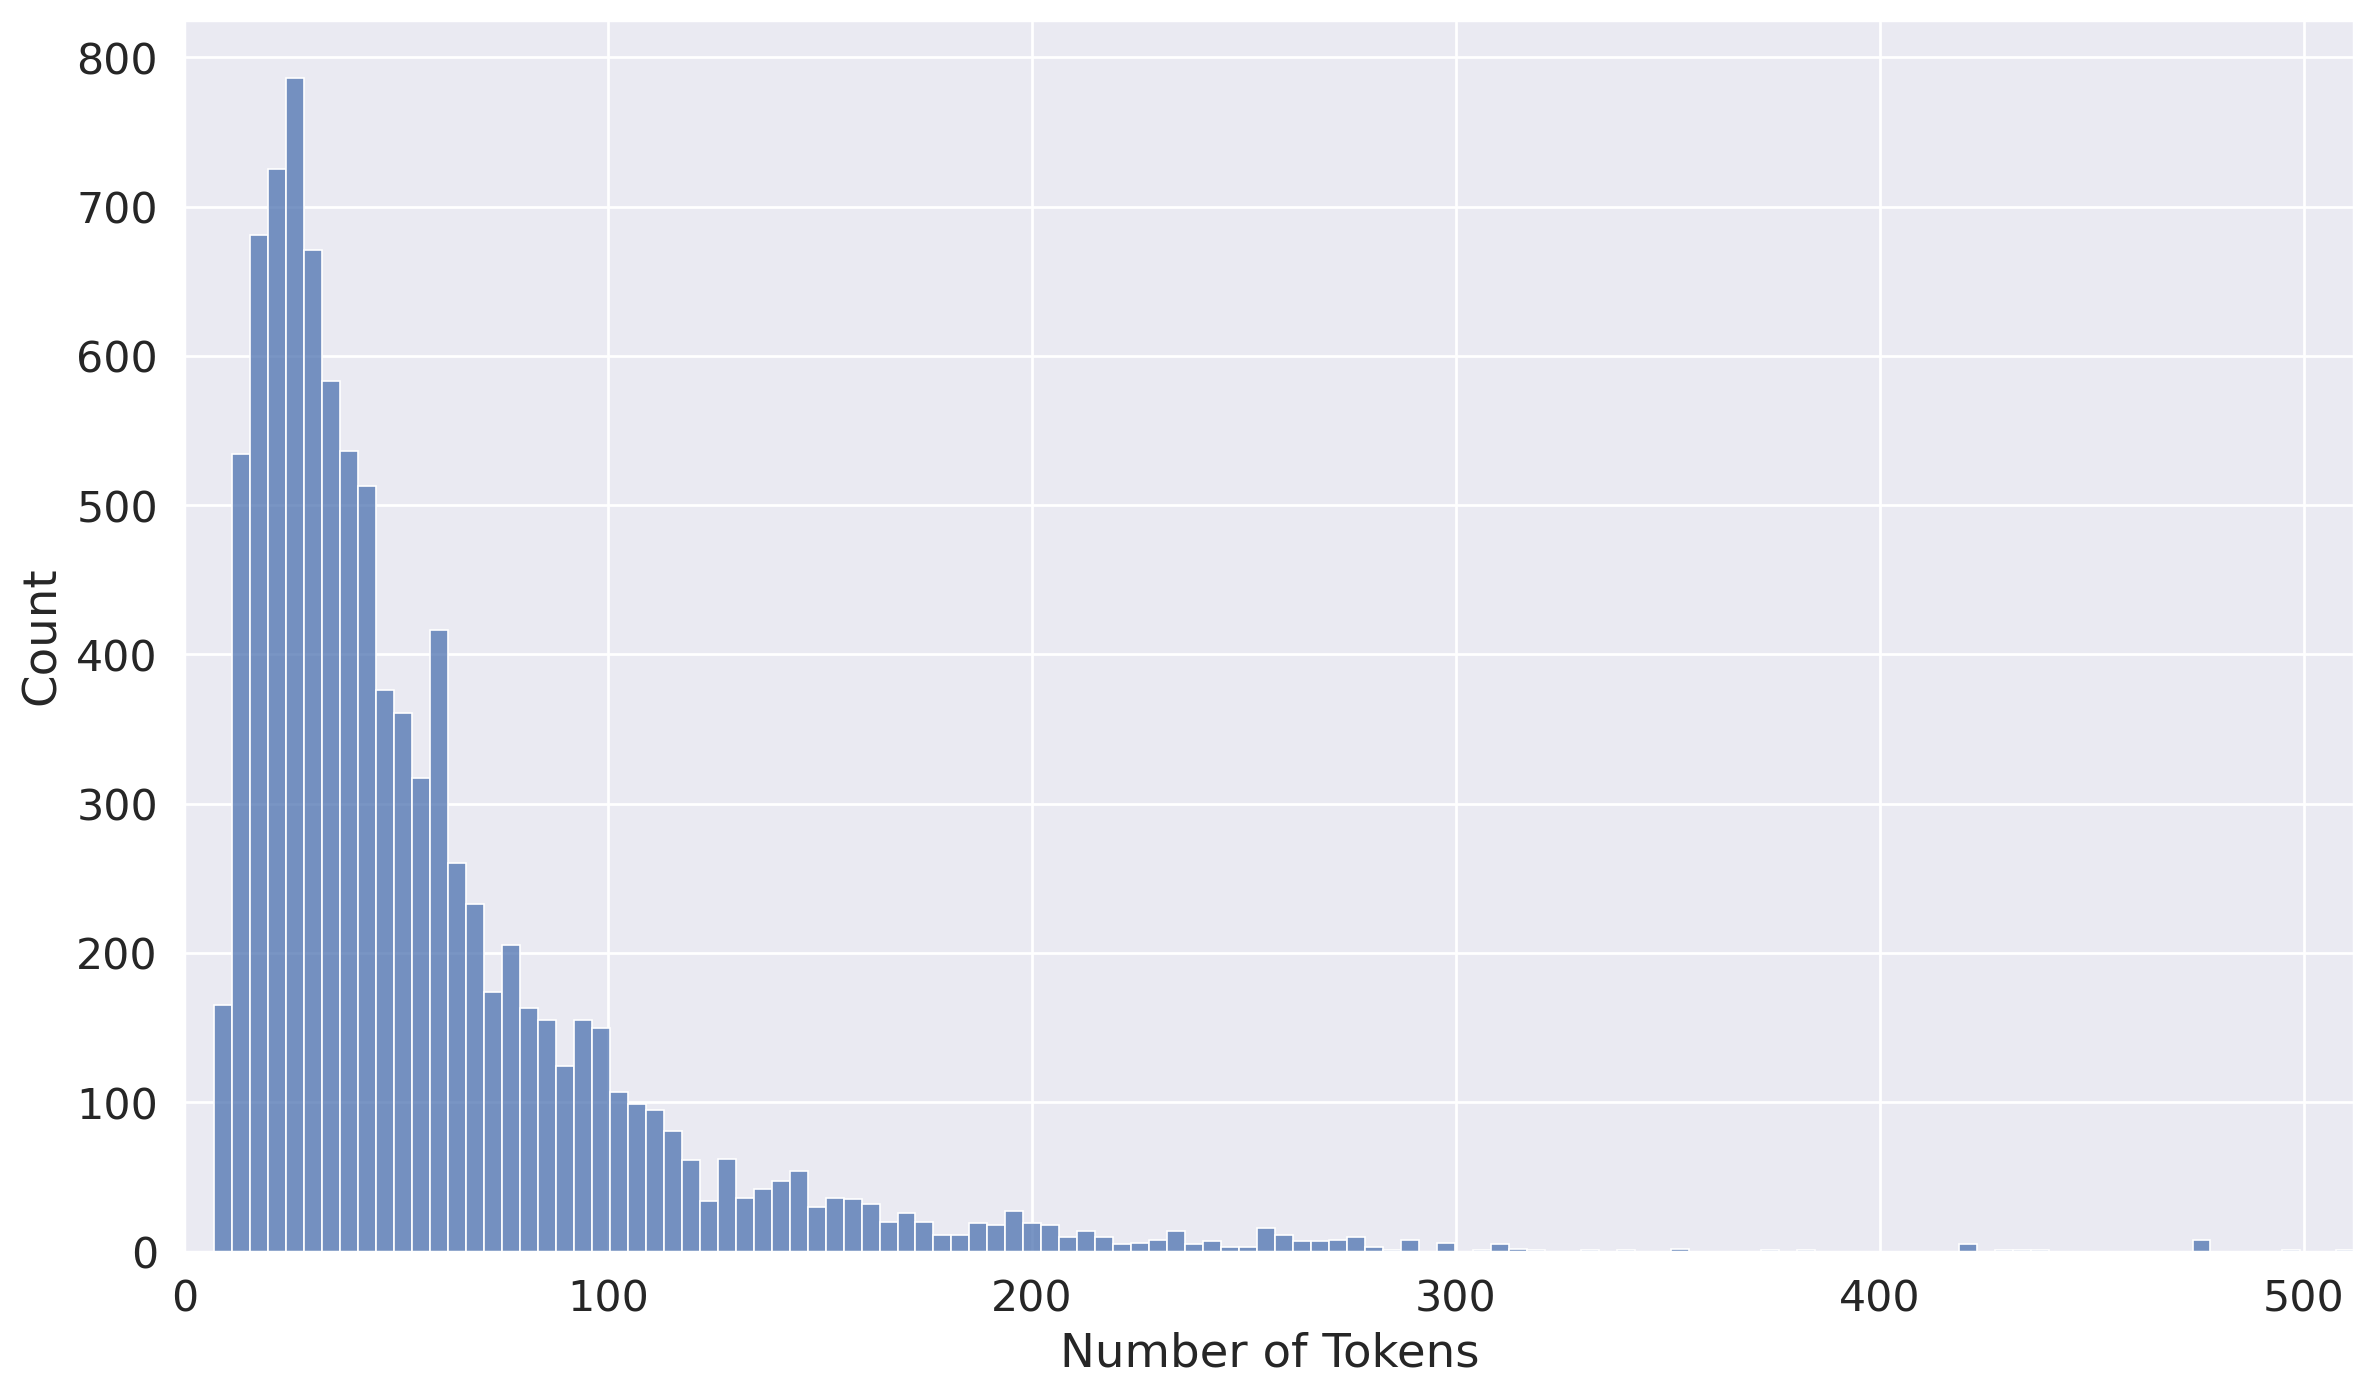

In [ ]:
#@title
sns.set(font_scale=1.4)
plt.rcParams["figure.figsize"] = (14,8)
sns.histplot(token_lens)
plt.xlim([0, 512])
plt.xlabel('Number of Tokens')
plt.show()

#### The **great majority** of the reviews seems to have **less than 240 tokens**, that's the **maximum length** that we'll choose.

In [ ]:
#@title
MAX_SEQ_LENGTH = 240

#### **Split** the **dataset** into **train** (70 %), **validation** (15%) and **test** (15%) sets and **preserve** the **same proportions** of **observations** in **each class** as **observed** in the **original dataset**

In [ ]:
#@title
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_reviews'],df.sentiment, test_size=0.3, random_state = 42, stratify=df.sentiment)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state = 42, stratify= y_test)

In [ ]:
#@title
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

#### **Convert to list each of the sets**

In [ ]:
#@title

train_reviews = x_train.tolist()
val_reviews = x_val.tolist()
test_reviews = x_test.tolist()

### **Create** a sequence of **token ids** (input ids) for **each review**

- **`tokenizer.encode`** converts a **string** in a sequence of **intput ids** (integers) using the **tokenizer** and the **vocabulary**, meaning, it **splits** a string **into tokens** and **map the tokens to their ids**.


-  We must **add special tokens** - `[CLS]` and `[SEP]` - for **classification** tasks.

- In NLP and deep learning models like BERT, [CLS] and [SEP] are special tokens used for classification tasks 
- **[CLS] token**: This token stands for "classification" and is used as the first token in the input sequence of a BERT model for classification tasks. The [CLS] token is used to generate the final output for classification tasks by using its hidden state, which summarizes the input sequence. This hidden state is then passed through a final classification layer to generate the classification result.
- **[SEP] token**: This token stands for "separator" and is used to separate two sequences in the input. In tasks like sentence classification, where two sentences are given as input, the [SEP] token is used to separate the two sentences. This allows the model to distinguish between the two input sequences and process them separately.

In [ ]:
#@title
# Train dataset
train_input_ids = [tokenizer.encode(train_reviews[i],add_special_tokens = True, max_length=MAX_SEQ_LENGTH, truncation=True) for i in range(0,len(train_reviews))]
# Val dataset
val_input_ids = [tokenizer.encode(val_reviews[i],add_special_tokens = True, max_length=MAX_SEQ_LENGTH, truncation=True) for i in range(0,len(val_reviews))]
# Test dataset
test_input_ids = [tokenizer.encode(test_reviews[i],add_special_tokens = True, max_length=MAX_SEQ_LENGTH, truncation=True) for i in range(0,len(test_reviews))]

### **Padding** and **truncating**: pad and truncate our sequences so that they all have the **same length**:

- **Padding**: when necessary, paddding wiil **add zeros** to make all the sequences **reach** the **length** of **MAX_SEQ_LENGTH**

- **Truncating**: when necessary, sequences **longer than the MAX_SEQ_LENGTH** are **truncated** to **MAX_SEQ_LENGTH**

- **Note**: '**post**' specifies that we want to pad and truncate at the **end** of the sequence. 

In [ ]:
#@title
# from keras.preprocessing.sequence import pad_sequences    # Pad utility function to pad sequences to maximum length.
from keras_preprocessing.sequence import pad_sequences
 
# Padding value: is optional, the default is 0.

# Train dataset
train_input_ids = pad_sequences(train_input_ids, maxlen=MAX_SEQ_LENGTH, dtype="long", 
                          value=0, truncating="post", padding="post")

# Validation dataset
val_input_ids = pad_sequences(val_input_ids, maxlen=MAX_SEQ_LENGTH, dtype="long", 
                          value=0, truncating="post", padding="post")

# Test dataset
test_input_ids = pad_sequences(test_input_ids, maxlen=MAX_SEQ_LENGTH, dtype="long", 
                          value=0, truncating="post", padding="post")

### **Attention Masks**

Attention masking is used in transformer-based models to selectively attend to certain parts of the input sequence while ignoring others. This is done to improve the model's performance by focusing on the relevant parts of the input sequence and ignoring the irrelevant parts.

The attention masks **differentiate** which tokens are **`real`** tokens versus which are **`[PAD]`** tokens.

In [ ]:
#@title
# Create attention masks

# Train dataset
train_attention_masks = [[int(token_id > 0) for token_id in review]
                         for review in train_input_ids]
# dev dataset
val_attention_masks = [[int(token_id > 0) for token_id in review]
                         for review in val_input_ids]
# Test dataset
test_attention_masks = [[int(token_id > 0) for token_id in review]
                         for review in test_input_ids]

### **Convert all lists** of **inputs ids**, **labels** and **attention masks** into **torch tensors**

In [ ]:
#@title
# input_ids
train_inputs = torch.tensor(train_input_ids)
val_inputs = torch.tensor(val_input_ids)
test_inputs = torch.tensor(test_input_ids)
# labels
train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_val.values)
test_labels = torch.tensor(y_test.values)
# attention masks
train_masks = torch.tensor(train_attention_masks)
val_masks = torch.tensor(val_attention_masks)
test_masks = torch.tensor(test_attention_masks)

### Create a **`DataLoader`** to **load** our **datasets**. Serves as an **iterator**, it **saves memory during training** when compared with a **for loop**

In [ ]:
#@title
batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [ ]:
#@title
# Number of classes / labels
n_classes = y_train.nunique()
n_classes

2

## **Build a sentiment Classifier**

### **BertForSequenceClassification**

- We'll use the **BertForSequenceClassification** model for our classification task. It's a **Bert Model transformer** with an **added layer on top of it** for **classification**.

- We are using **Pytorch framework** for model **training** and **evaluation** for **classification** purposes, hence we have chosen **BertForSequeunceClassification class** to be used.

#### **Instantiate** our model:

In [ ]:
#@title
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # The 12-layer BERT model with an uncased vocab
    num_labels = 2, # For binary classification  
    output_attentions = False, # Not to return attentions weights
    output_hidden_states = False, # Not to return all hidden-states
)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

#### **Move** our model to the **GPU**

In [ ]:
#@title
model = model.to(device) 

### To **fine-tune** our Bert Classifier we need to create an **`optimizer`**. The authors have some **recommendations** for **fine-tuning**:

- **Batch size**: 16, 32
- **Learning rate** (Adam): 5e-5, 3e-5, 2e-5
- **Number of epochs**: 2, 3 or 4

We chose **16**, **3e-5** and **2**, respectively.




### **Optimizer**, **learning rate scheduler**, **loss function** and **number of epochs**


**Notes**:

- To **fine-tune** our Bert classifier we need to create an **`optimizer`**. Considering the **original paper** on **BERT**, we will use <a href="https://huggingface.co/transformers/main_classes/optimizer_schedules.html" target="_blank">AdamW</a> **optimizer** because it implements **gradient bias correction** as well as **weight decay**. We will also use **linear scheduler with no warmup steps**.

- The authors have some recommendations for fine-tuning:

    - Batch size: 16, 32
    - Learning rate (Adam): 5e-5, 3e-5, 2e-5
    - Number of epochs: 2, 3 or 4

We chose **16**, **3e-5** and **2**, respectively.
<br><br>

In [ ]:
#@title
epochs=2

optimizer=AdamW(model.parameters(),lr=3e-5)
total_steps=len(train_dataloader)*epochs

# Create the learning rate scheduler
scheduler=get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
 # Define loss function and move it to GPU
loss_fn=nn.CrossEntropyLoss().to(device)

## **Training** our model and **validation**: 

#### Function for calculating **elapsed time**

In [ ]:
#@title
# Function calculates training and validation time
def format_time(elapsed):
    # Round to the nearest second
    elapsed_round = int(round(elapsed))
    # Format time in hh:mm:ss
    return str(datetime.timedelta(seconds = elapsed_round))

#### Function for calculating **accuracy**

In [ ]:
#@title
def accuracy(preds, labels):
    preds = np.argmax(preds, axis=1).flatten()
    labels = labels.flatten()
    return np.sum(preds == labels) / len(labels)

### **Training, Validation and Loss**

### **Training** and **validation**
- We can **store** the **training** and **validation loss** and **accuracy values** and then **plot** or **make a table** to **measure the performance** on both the **train** and **validation** sets **after the completion of each epoch** so we can see **more clearly** the **progress** of the **training loop**.



- **Loss Function**  
 - For sentiment analysis task, the loss function used is **cross-entropy loss** which BERT uses to measure the difference between the predicted sentiment label and the actual label. To minimize the cross-entropy loss, the BERT model adjusts the weights of its parameters using an optimization algorithm such as stochastic gradient descent. The optimization algorithm iteratively updates the weights of the model based on the gradients of the loss function with respect to the model's parameters. By adjusting the weights of its parameters, the BERT model can reduce the difference between the predicted output and the actual output, thereby minimizing the cross-entropy loss. 

In [ ]:
#@title
# Store for each epoch
loss_train_values = []
acc_train_values = []
loss_val_values = []
acc_val_values = []
for epoch in range(0,epochs):
     
        #             --- Train---
        
        # Perform forward pass over the training dataset
        print("\n Epoch {:}/{:} :".format(epoch+1,epochs))
        print('Training....')
        
        # Measure how long the training epoch takes
        t0 = time.time()
        # Reset total loss and accuracy for this epoch
        total_loss = 0
        total_acc = 0

        # Put the model in training mode
        model.train()
        
        # For each batch of training data
        for step, batch in enumerate(train_dataloader):
            # Update progress for each 100 steps
            if (step % 100==0) & (not step==0):
                # Calculate elapsed time in minutes
                elapsed = format_time((time.time()-t0))
                # Report progress
                print(' Batch {:>5,} of {:>5,}. Elapsed:{:}.'.format(step,len(train_dataloader),elapsed))
            
            # Unpack training batch from trainloader and move to GPU
            b_input_ids = batch[0].to(device)  # 0 - input ids tensor
            b_attention_mask = batch[1].to(device) # 1 - input masks tensor
            b_labels = batch[2].to(device) # 2 - labels tensor
            
            # Clear any previously calculated gradients in Pytorch before performing a backward pass
            model.zero_grad()
            
            # Output the results
            outputs = model(input_ids = b_input_ids, attention_mask = b_attention_mask, labels=b_labels) # Return tuple
            # Loss value from output
            loss = outputs.loss   # Loss
            
            # Update total loss
            total_loss += loss.item()
            
            preds = outputs.logits  # Output probabilities
            # Move logits and labels to CPU
            preds = preds.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch 
            tmp_train_accuracy = accuracy(preds, label_ids)

            # Accumulate the total accuracy
            total_acc += tmp_train_accuracy
            
            # Perform a backward pass to calculate gradients
            loss.backward()
            
            # To avoid exploding vanishing gradients problem, clip the norm of the gradients to 1.0
            torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)
            
            # Update the parameters (weights)
            optimizer.step()
            
            # Update the learning rate
            scheduler.step()
            
        # Calculate the average loss over training data
        avg_total_loss = total_loss/len(train_dataloader)
            
        # Store the loss values
        loss_train_values.append(avg_total_loss)

        # Calculate the average accuracy over the training data
        avg_train_acc = total_acc / len(train_dataloader)

        # Store the accuracy values 
        acc_train_values.append(avg_train_acc)

        print("")
        print("\nAverage training accuracy: {0:.2f}".format(avg_train_acc))
        
        print('Average training loss : {0:.2f}'.format(avg_total_loss))
        print('Training epoch took: {:}'.format(format_time(time.time()- t0)))
 
        #             --- VALIDATION ---

        
        # After each epoch perform validation to check model performance
        print('\n Running validation...')
        
        t0 = time.time()
        # Put model in evaluation mode
        model.eval()
        
        # Tracking variables
        total_eval_accuracy = 0
        total_eval_loss = 0
        
        # Unpack validation batch from trainloader and move to GPU
        for batch in val_dataloader: 
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell model not to compute gradients to save memory and accelerate validation
            with torch.no_grad():
                # Forward pass, calculate logit prediction
                 outputs = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs.loss
            logits = outputs.logits
            # Update total evaluation loss
            total_eval_loss += loss.item()
            
            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch and accumulate it over all batches
            total_eval_accuracy += accuracy(logits, label_ids)

        # Compute the average accuracy over all of the batches
        avg_val_accuracy = total_eval_accuracy / len(val_dataloader)

        # Store the accuracy values 
        acc_val_values.append(avg_val_accuracy)
     
        # Compute the average loss over all of the batches
        avg_val_loss = total_eval_loss / len(val_dataloader)

         # Store the loss values
        loss_val_values.append(avg_val_loss)
    
    # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))




 Epoch 1/2 :
Training....
 Batch   100 of   417. Elapsed:0:01:04.
 Batch   200 of   417. Elapsed:0:02:04.
 Batch   300 of   417. Elapsed:0:03:03.
 Batch   400 of   417. Elapsed:0:04:03.


Average training accuracy: 0.91
Average training loss : 0.24
Training epoch took: 0:04:13

 Running validation...
  Accuracy: 0.95
  Validation Loss: 0.14
  Validation took: 0:00:19

 Epoch 2/2 :
Training....
 Batch   100 of   417. Elapsed:0:01:00.
 Batch   200 of   417. Elapsed:0:02:00.
 Batch   300 of   417. Elapsed:0:03:00.
 Batch   400 of   417. Elapsed:0:03:59.


Average training accuracy: 0.98
Average training loss : 0.07
Training epoch took: 0:04:09

 Running validation...
  Accuracy: 0.97
  Validation Loss: 0.15
  Validation took: 0:00:18


**Plot validation accuracy after** the **completion** of **each epoch**:

In [ ]:
#@title
df_acc = pd.DataFrame(acc_val_values,columns=['Accuracy'])

In [ ]:
#@title
df_acc.index+=1

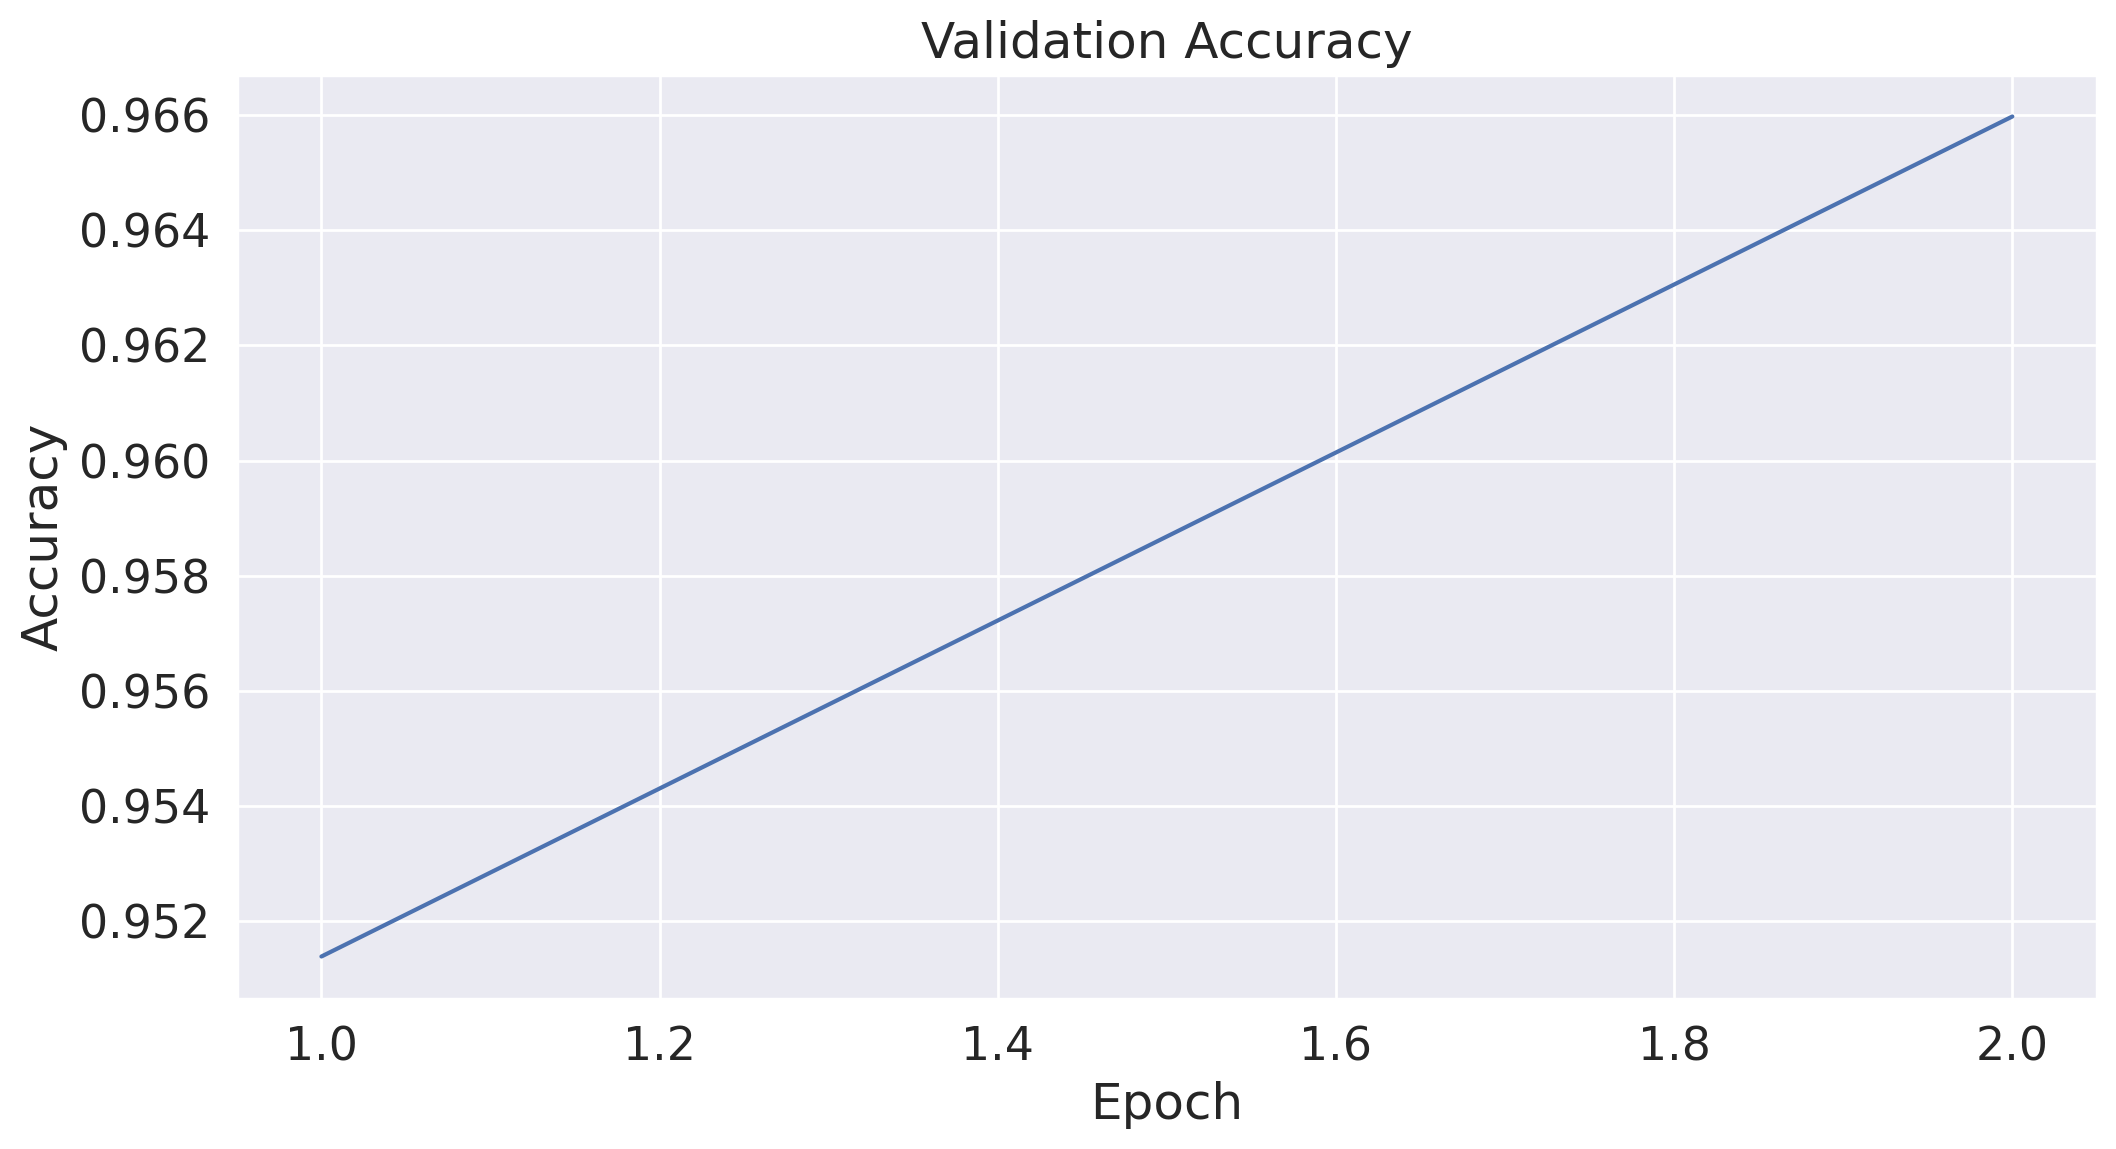

In [ ]:
#@title
# Use plot styling from seaborn
sns.set(style='darkgrid')

# Increase the plot size and font size
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve
sns.lineplot(data=df_acc,x=df_acc.index,y=df_acc.Accuracy)

# Label the plot
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()

**Plot validation loss after** the **completion** of **each epoch**:

In [ ]:
#@title
df_loss = pd.DataFrame(loss_val_values,columns=['Loss'])

In [ ]:
#@title
df_loss.index+=1

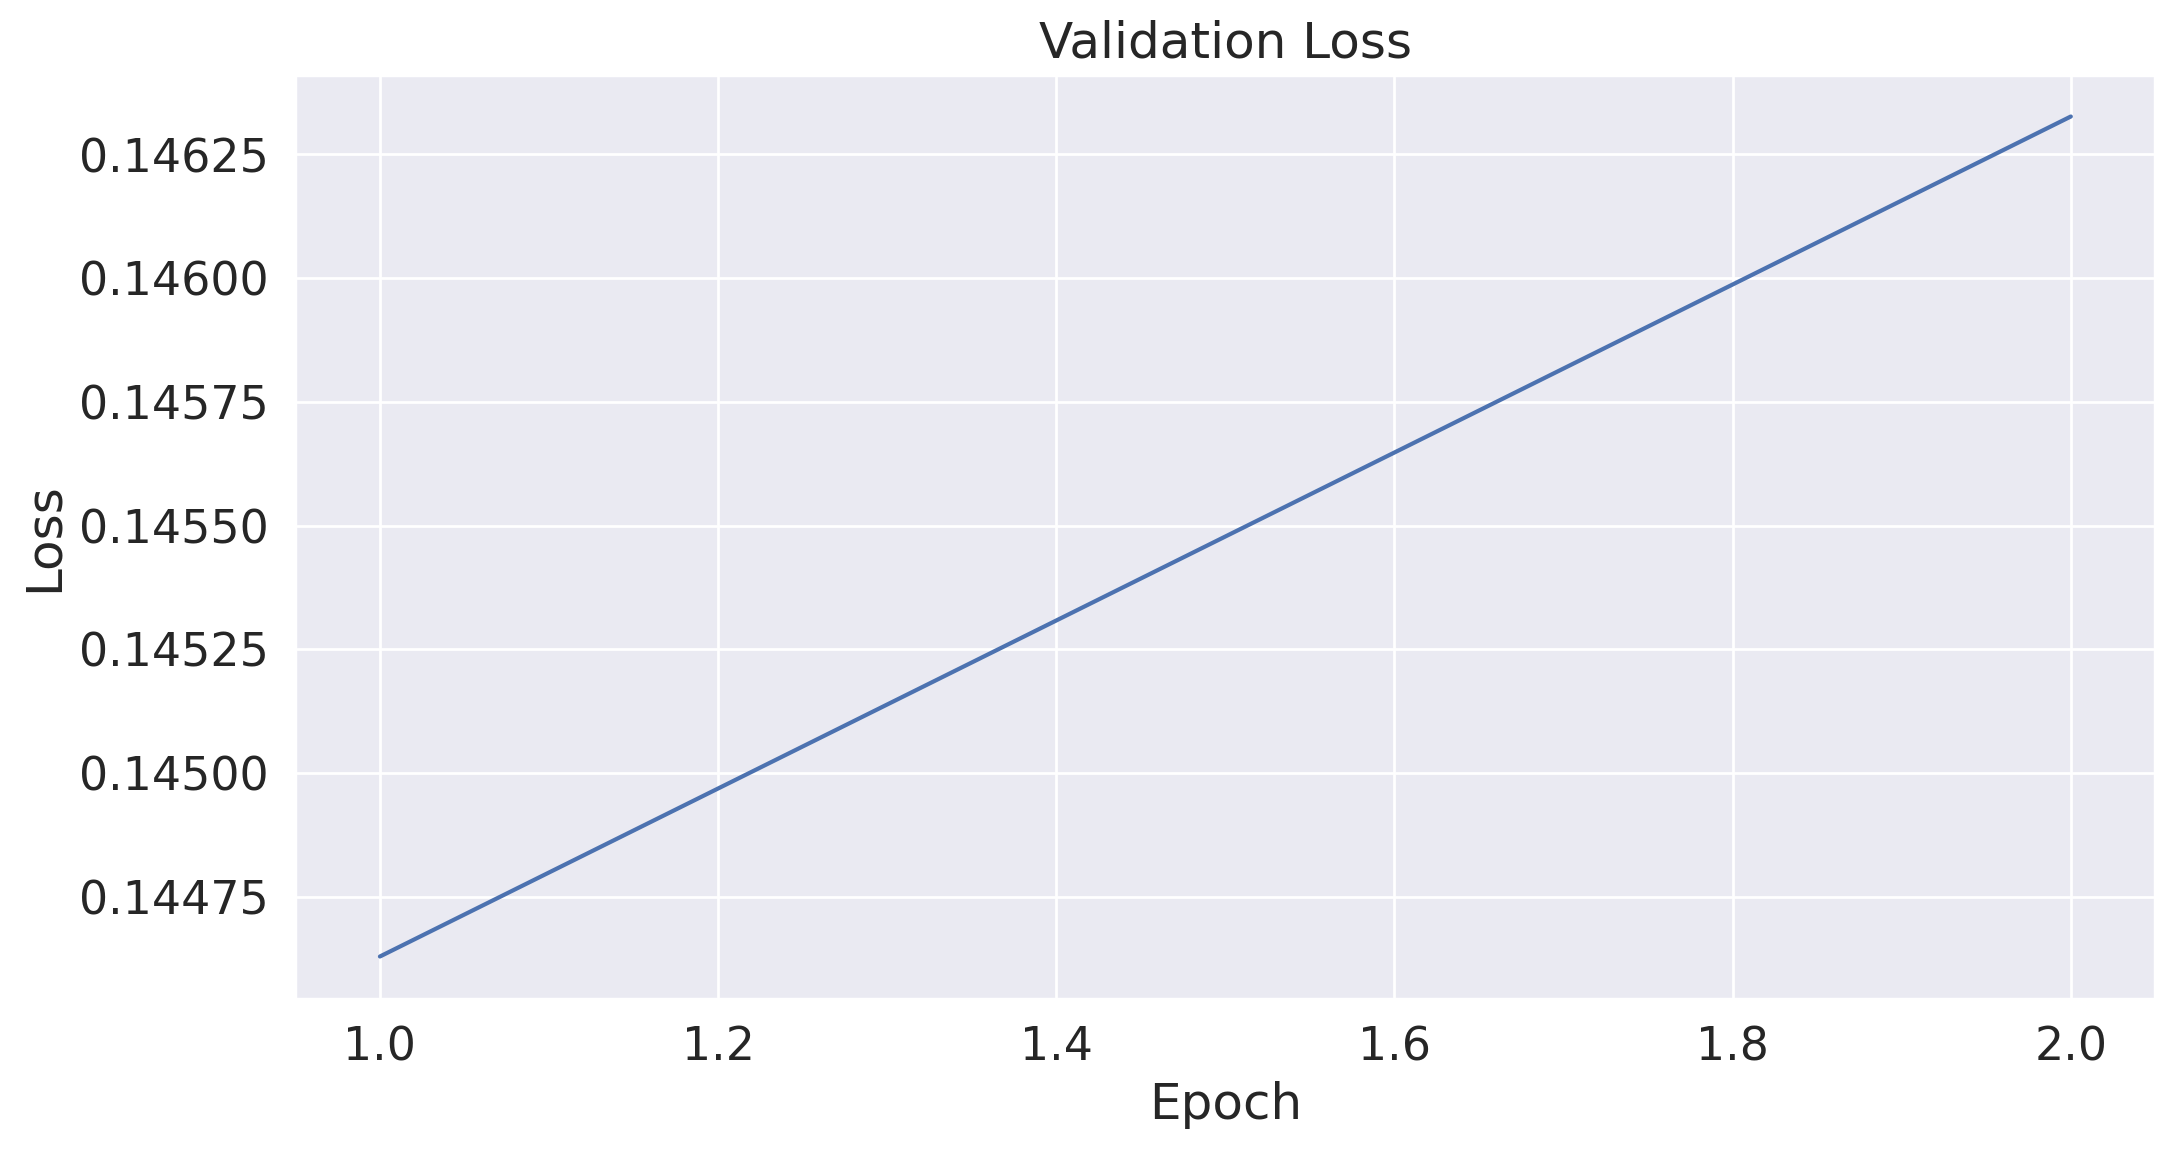

In [ ]:
#@title
# Use plot styling from seaborn
sns.set(style='darkgrid')

# Increase the plot size and font size
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve
sns.lineplot(data=df_loss,x=df_loss.index,y=df_loss.Loss)

# Label the plot
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

#### **Predicting** on **test set**


In [ ]:
#@title
# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict test data
for batch in test_dataloader:
    # Move batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack inputs from test dataloader
    b_input_ids, b_attention_mask, b_labels = batch
    # Tell model not to compute gradients to save memory and accelerate validation
    with torch.no_grad():
        # Forward pass, calculate logit prediction
        outputs = model(input_ids=b_input_ids, attention_mask=b_attention_mask)
    # logits are class probabilities and get them from outputs
    logits = outputs[0]
    
    # Store predictions and true labels
    predictions.extend(logits.tolist())
    true_labels.extend(b_labels.tolist())

print('Done')

Done


#### **Convert predictions** to **tensor**

In [ ]:
#@title
preds = torch.tensor(predictions)

#### **Apply softmax** on **predictions**

In [ ]:
#@title
import torch.nn.functional as F

preds = F.softmax(preds,dim=1)

#### **Convert to numpy arrays**

In [ ]:
#@title
preds = np.array(preds)
true_labels = np.array(true_labels)

#### **Function** for **Heatmap of confusion matrix** for **test data**

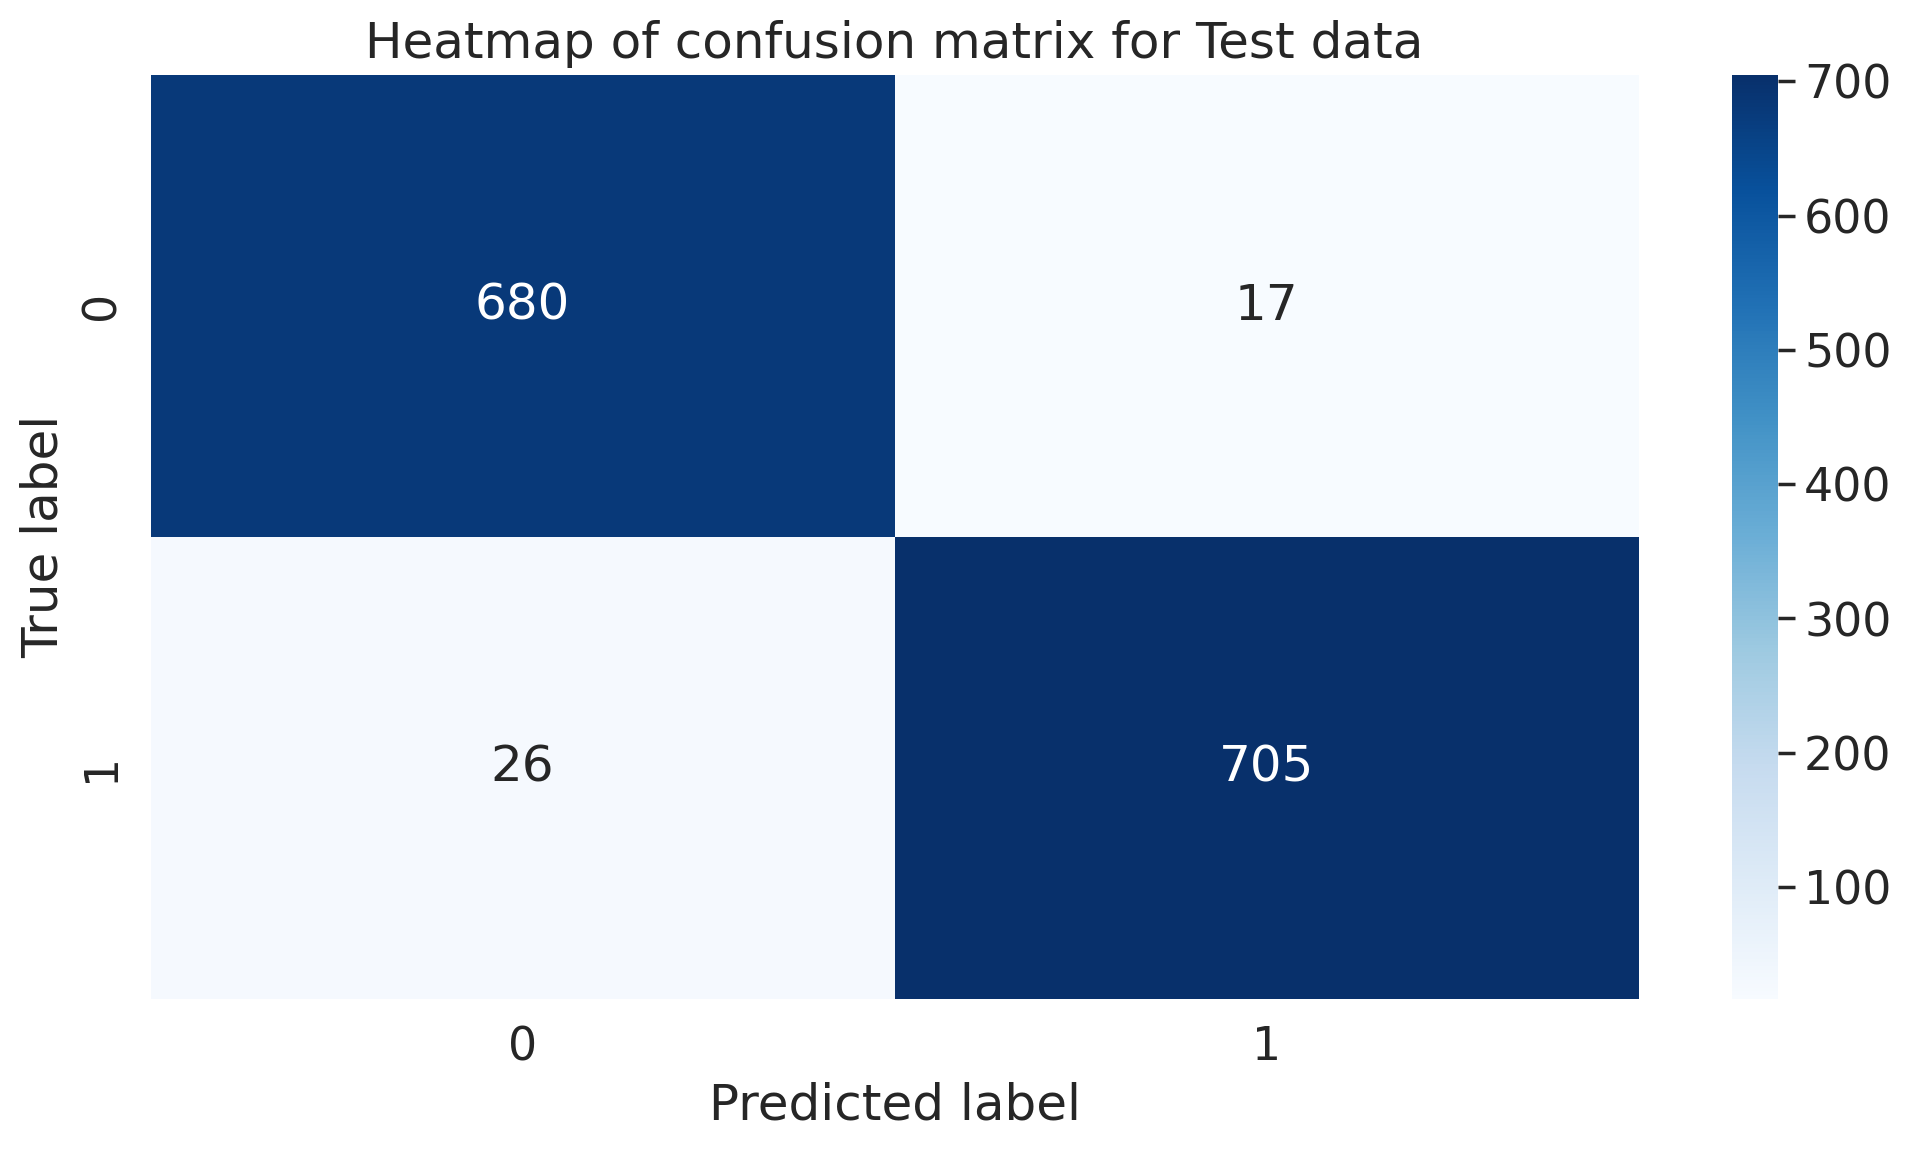

In [ ]:
#@title
def evaluate(y_test, predictions):
    cf_matrix = confusion_matrix(true_labels, preds.argmax(1))
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of confusion matrix for Test data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
evaluate(true_labels, preds.argmax(1))

#### **Classification Report**

In [ ]:
#@title
class_report= classification_report(true_labels, preds.argmax(1), digits=3)
print(class_report)

              precision    recall  f1-score   support

           0      0.963     0.976     0.969       697
           1      0.976     0.964     0.970       731

    accuracy                          0.970      1428
   macro avg      0.970     0.970     0.970      1428
weighted avg      0.970     0.970     0.970      1428



## **Conclusions**:
- Our model seems to **generalize well** because the **accuracy on the test set** is **very similar** to the **accuracy on the validation set** (even higher: **97.8 > 97.5%**).
- When **comparing** the **1st** and **2nd epochs**, **validation loss decreases** which **indicates** that **we aren't over-fitting on the training data**.
- The model achieves a **high F1 Scores**: **≈ 97.8% / 97.9%**.
- It is possible that **if we didn't remove the stopwords** we would **achieve a slight increase in F1 Score**. However, as we previously explained, **we chose not to include the stopwords** (with the exception of 'not' and 'no') **due to the reason mentioned above**. We **can't have the best of both worlds!**




---



---



# Part II: Converting Yelp Reviews into Sentiment Scores with BERT

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_reviews = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_review.json', nrows = 10000, lines=True)
df_reviews.shape

(10000, 9)

In [ ]:
df_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
cols_to_drop = ["user_id", "useful", "funny", "date"]
df_reviews = df_reviews.drop(cols_to_drop, axis=1)
df_reviews = df_reviews.drop("cool", axis=1)
df_reviews = df_reviews.drop("review_id", axis=1)

df_reviews.head()

,business_id,stars,text
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is..."
1,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...
2,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...
3,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo..."
4,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...


In [ ]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors = "pt")
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
sentiment_score(df_reviews["text"].iloc[0])
sentiment_score(df_reviews["text"].iloc[2])

5

In [ ]:
df_reviews["sentiment"] = df_reviews["text"].apply(lambda x: sentiment_score(x[:512]))
df_reviews.head()

,business_id,stars,text,sentiment
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",3
1,7ATYjTIgM3jUlt4UM3IypQ,5,I've taken a lot of spin classes over the year...,1
2,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,5
3,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",5
4,e4Vwtrqf-wpJfwesgvdgxQ,4,Cute interior and owner (?) gave us tour of up...,3




---



---



# Part III: Restaurant Recommendation

### Installing Packages

In [ ]:
# Installing packages
!apt install gdal-bin python-gdal python3-gdal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate


In [ ]:
!apt install python3-rtree
!pip install git+git://github.com/geopandas/geopandas.github

!pip install descartes
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  javascript-common libjs-jquery libjs-underscore libspatialindex-c6
  libspatialindex-dev libspatialindex6
Suggested packages:
  apache2 | lighttpd | httpd
The following NEW packages will be installed:
  javascript-common libjs-jquery libjs-underscore libspatialindex-c6
  libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 7 newly installed, 0 to remove and 24 not upgraded.
Need to get 829 kB of archives.
After this operation, 3,054 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 javascript-common all 11 [6,066 B]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libjs-jquery all 3.3.1~dfsg-3 [329 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libjs-underscore all 1.9.1~dfsg-1ubuntu0.20.04.1 [99.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/univer

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 48.3 MB/s eta 0:00:00


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_json('/content/drive/MyDrive/yelp_academic_dataset_business.json', nrows = 10000, lines=True)
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
# The dataframe has 14 columns and 192,609 rows
df.shape

(10000, 14)

In [ ]:
# df = pd.merge(df, df_reviews, on = "business_id", how = "inner")
# df.head()

### Exploratory Data Analysis

In [ ]:
# Filter out only restaurants from the dataset
df["Restaurants"] = df["categories"].str.contains("Restaurants")
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,False
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",False
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",False


In [ ]:
df_restaurants = df.loc[df.Restaurants == True]
df_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '...",True
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None,True
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '...",True
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'...",True


In [ ]:
df_restaurants.shape

(3466, 15)

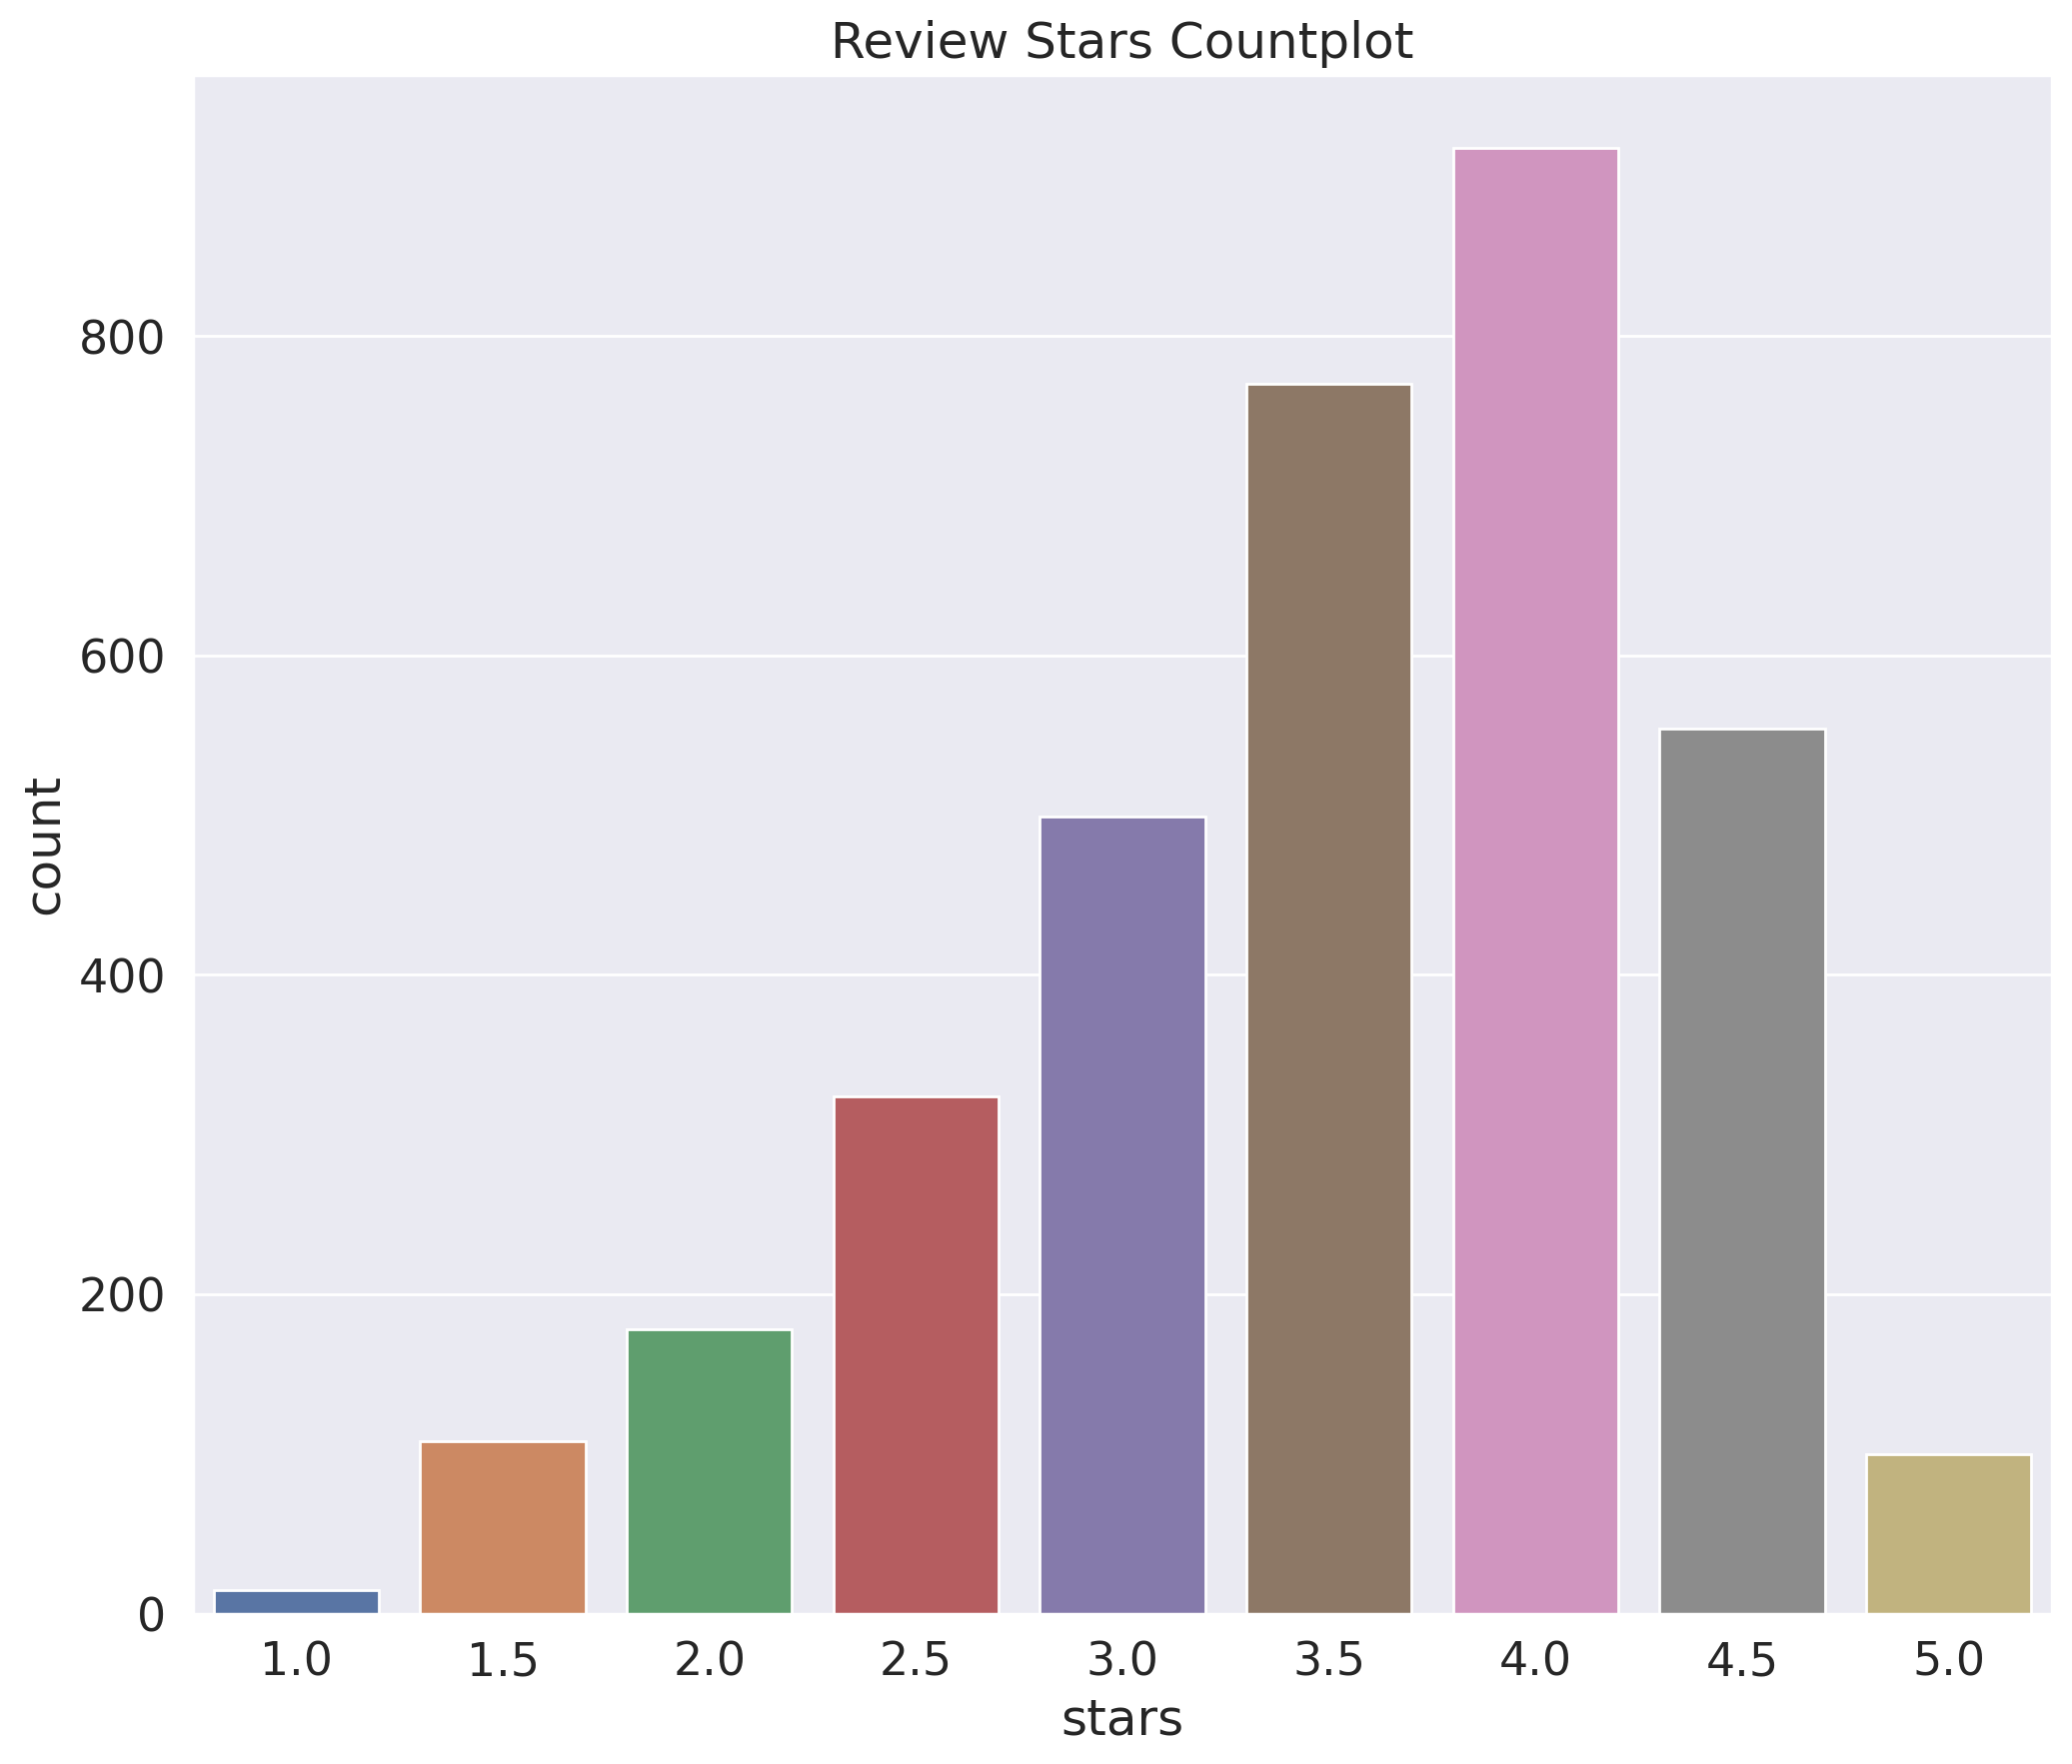

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))
sns.countplot(x=df_restaurants["stars"])
plt.title("Review Stars Countplot")
#plt.savefig("stars.png")
plt.show()

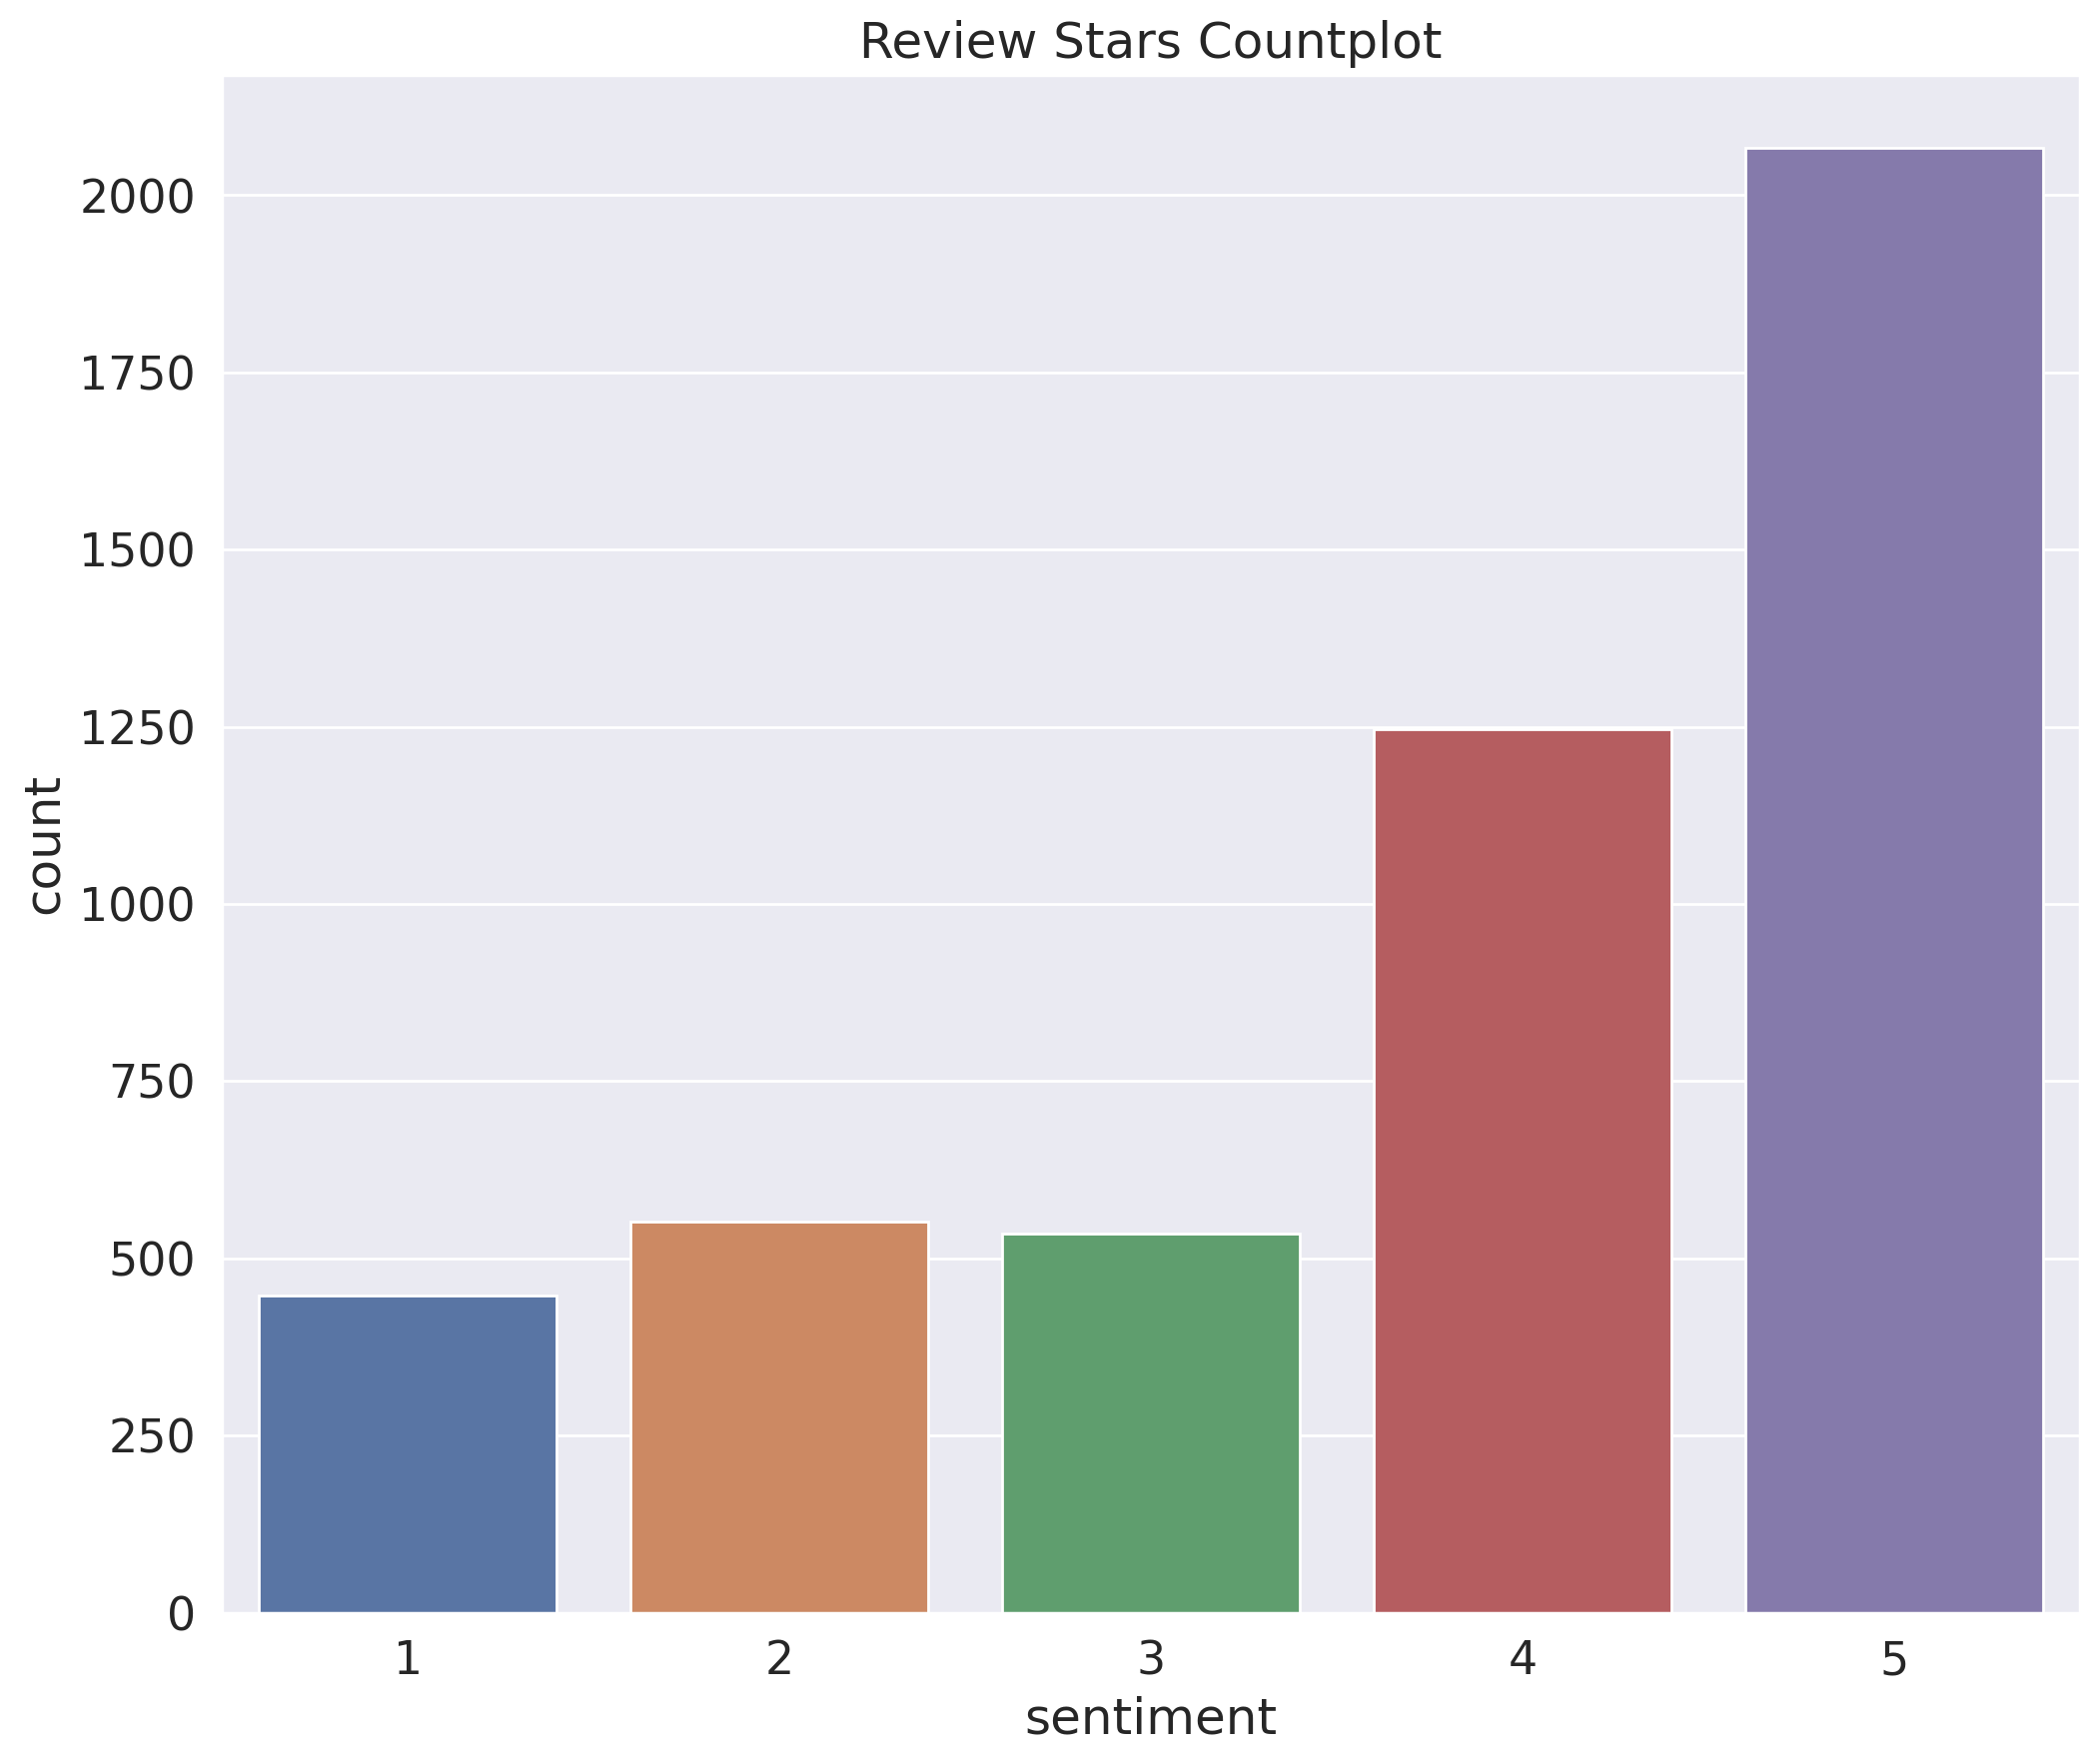

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))
sns.countplot(x=df_restaurants["sentiment"])
plt.title("Sentiment Review Countplot")
#plt.savefig("stars.png")
plt.show()

In [ ]:
top_restaurants = df_restaurants.sort_values(by = ["review_count", "stars"], ascending = False)[:20]
top_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants
4497,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,New Orleans,LA,70130,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",True
141,SZU9c8V2GuREDN5KgyHFJw,Santa Barbara Shellfish Company,230 Stearns Wharf,Santa Barbara,CA,93101,34.408715,-119.685019,4.0,2404,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Live/Raw Food, Restaurants, Seafood, Beer Bar,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",True
2380,UCMSWPqzXjd7QHq7v8PJjQ,Prep & Pastry,2660 N Campbell Ave,Tucson,AZ,85719,32.255528,-110.943492,4.5,2126,1,"{'Alcohol': 'u'full_bar'', 'BikeParking': 'Tru...","Restaurants, Cocktail Bars, Bars, Comfort Food...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', '...",True
5851,vN6v8m4DO45Z4pp8yxxF_w,Surrey's Café & Juice Bar,1418 Magazine St,New Orleans,LA,70130,29.935799,-90.071906,4.5,2084,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Vegetarian, Restaurants, Breakfast & Brunch, C...","{'Monday': '8:0-15:0', 'Thursday': '8:0-15:0',...",True
957,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"{'NoiseLevel': 'u'average'', 'RestaurantsReser...","Bars, Breakfast & Brunch, Restaurants, Barbequ...","{'Wednesday': '11:30-20:0', 'Thursday': '11:30...",True


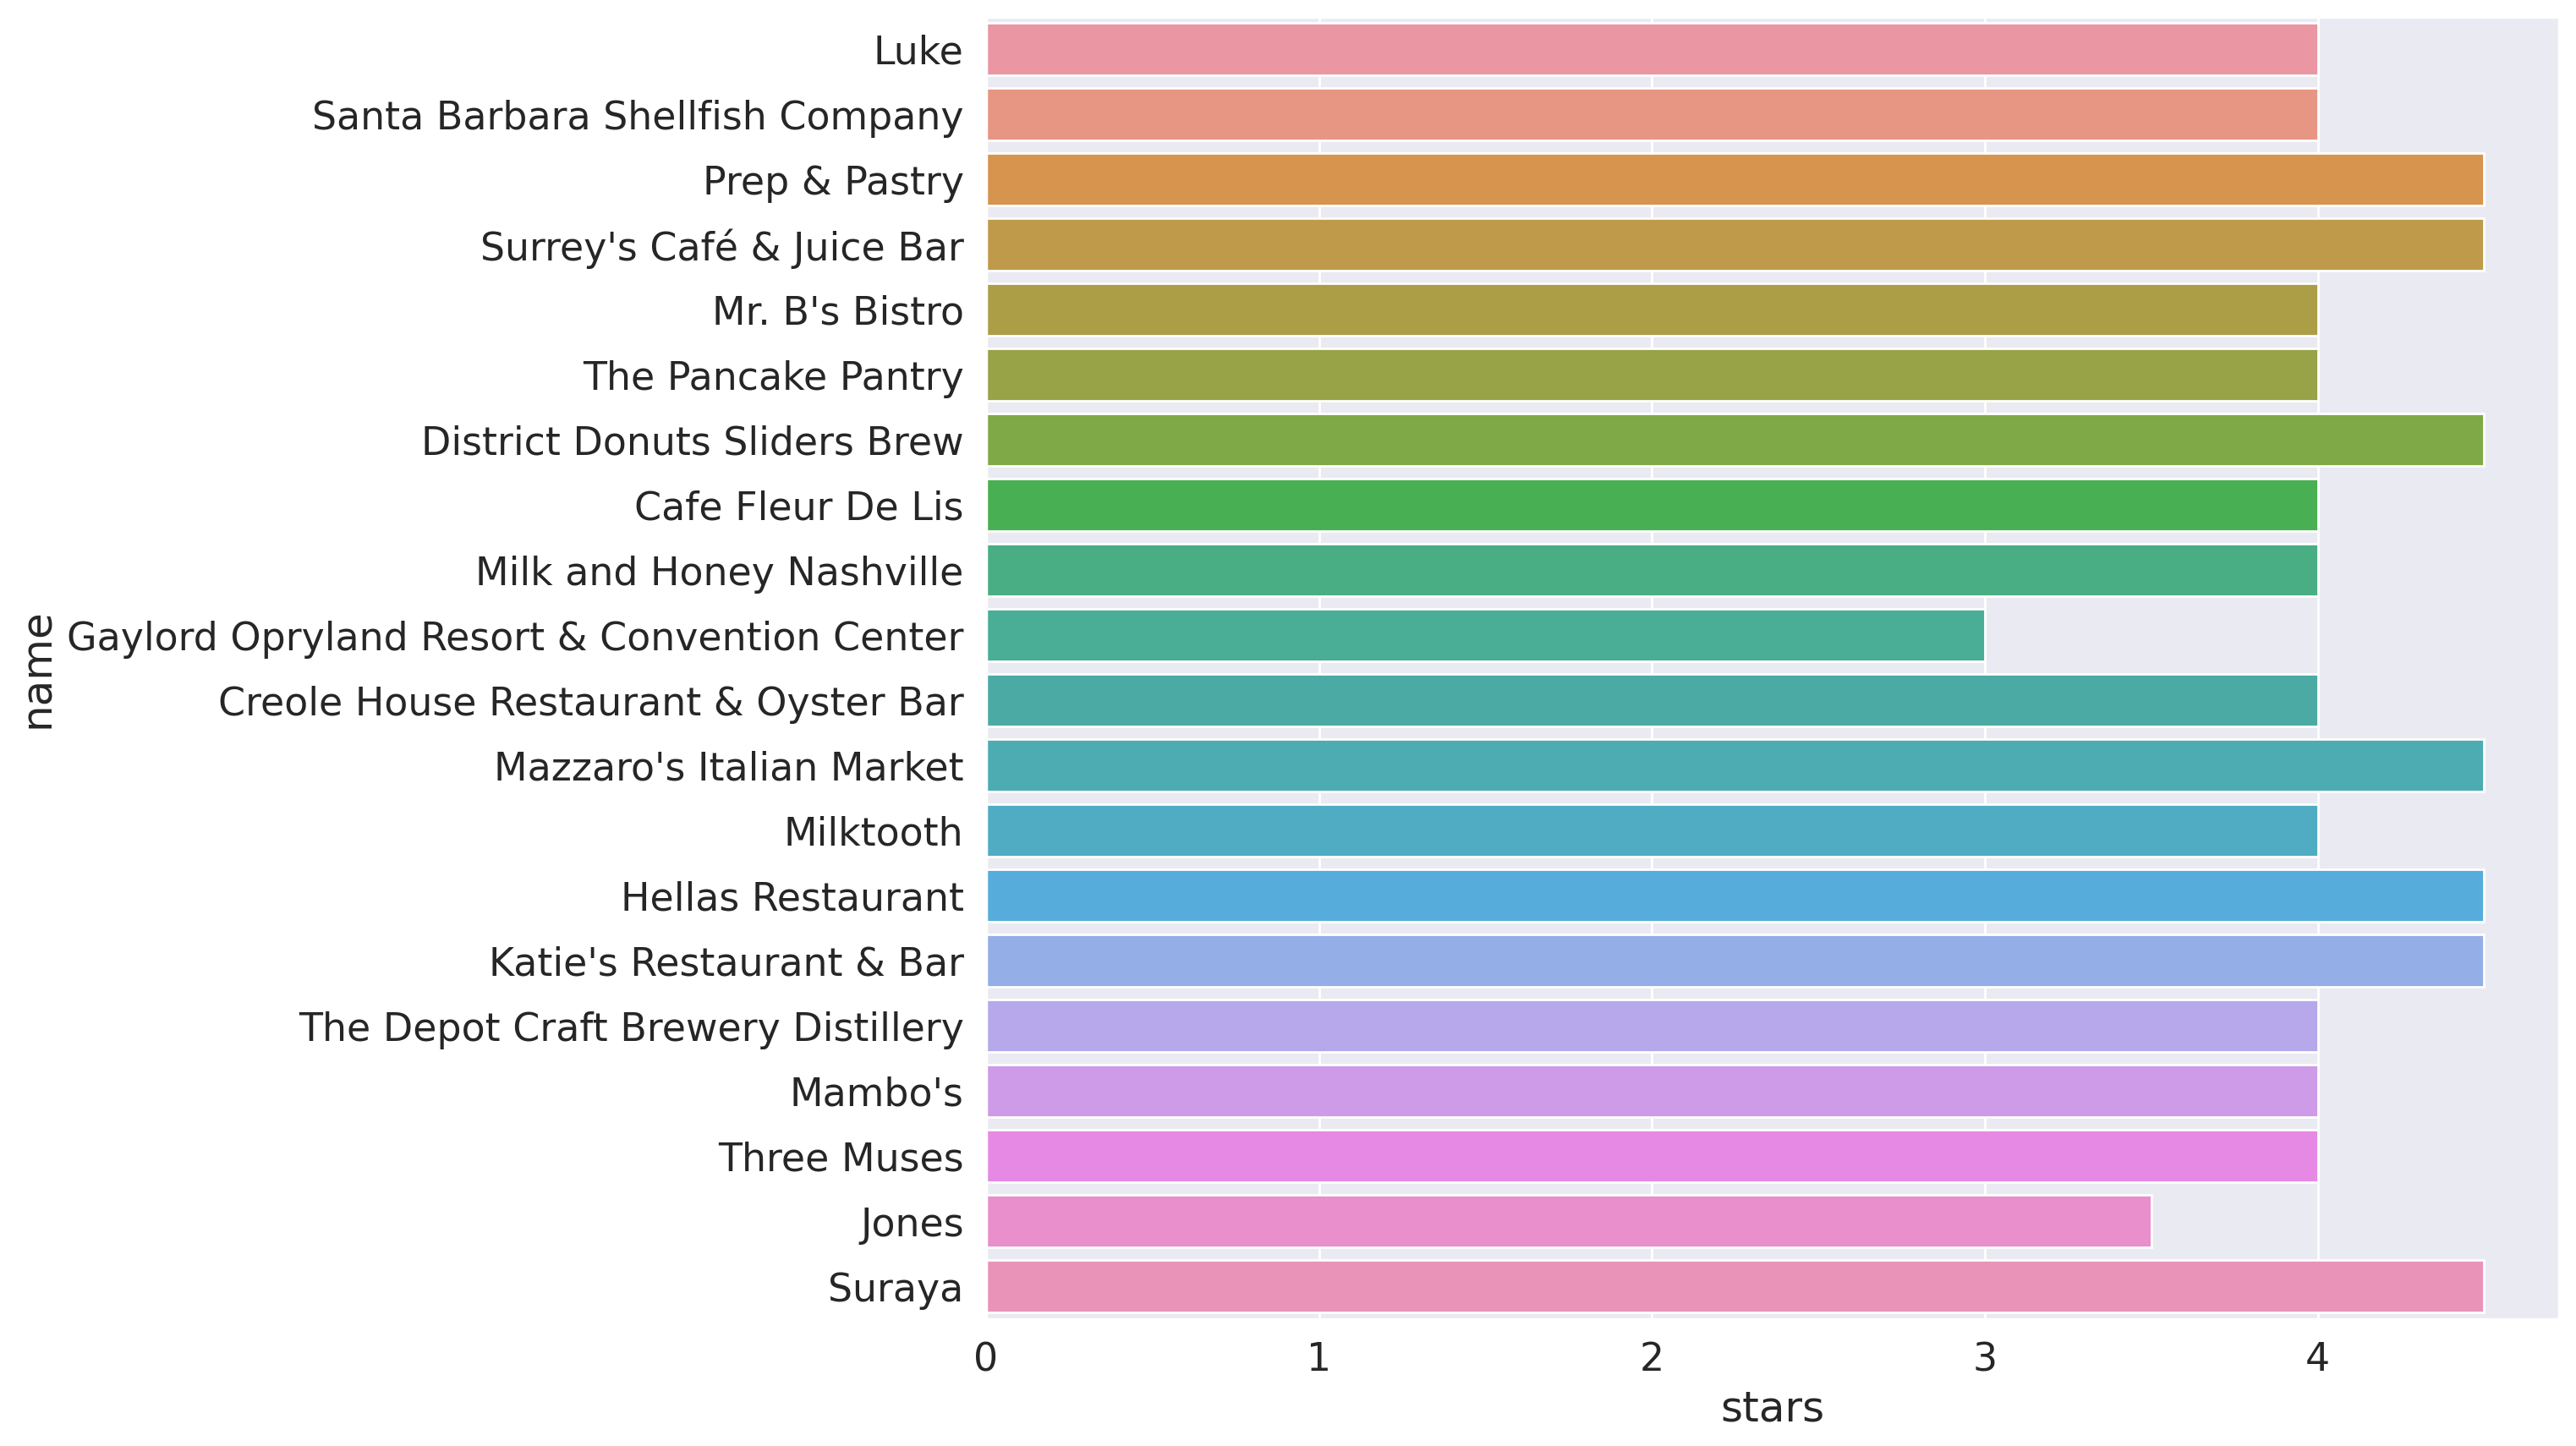

In [ ]:
fig, ax = plt.subplots(figsize = (12,10))
sns.barplot(x = "stars", y = "name", data = top_restaurants, ax = ax)
plt.savefig("top20_restaurants.png")
plt.show()

In [ ]:
px.set_mapbox_access_token("pk.eyJ1Ijoic2lkZHAyNzQiLCJhIjoiY2txZHM2bjdyMDd6bjJvbWxkcG5odW5zNCJ9.SZll1uNjsTQ-IdGd1n7zCw")
px.scatter_mapbox(df_restaurants, lat = "latitude", lon = "longitude", color = "stars", size = "review_count", size_max = 30, zoom = 3, width = 1200, height = 800)

In [ ]:
newOrleans = df_restaurants[df_restaurants.state == "LA"]
px.scatter_mapbox(newOrleans, lat = "latitude", lon = "longitude", color = "stars", size = "review_count", size_max = 30, zoom = 15, width = 1200, height = 800)

### K-Means Clustering

In [ ]:
# Use elbow method to determine the number of K in KMeans Clustering
coords = newOrleans[["longitude", "latitude"]]

distortions = []
K = range(1, 25)
for k in K:
  kmeansModel = KMeans(n_clusters=k)
  kMeansModel = kmeansModel.fit(coords)
  distortions.append(kmeansModel.inertia_)

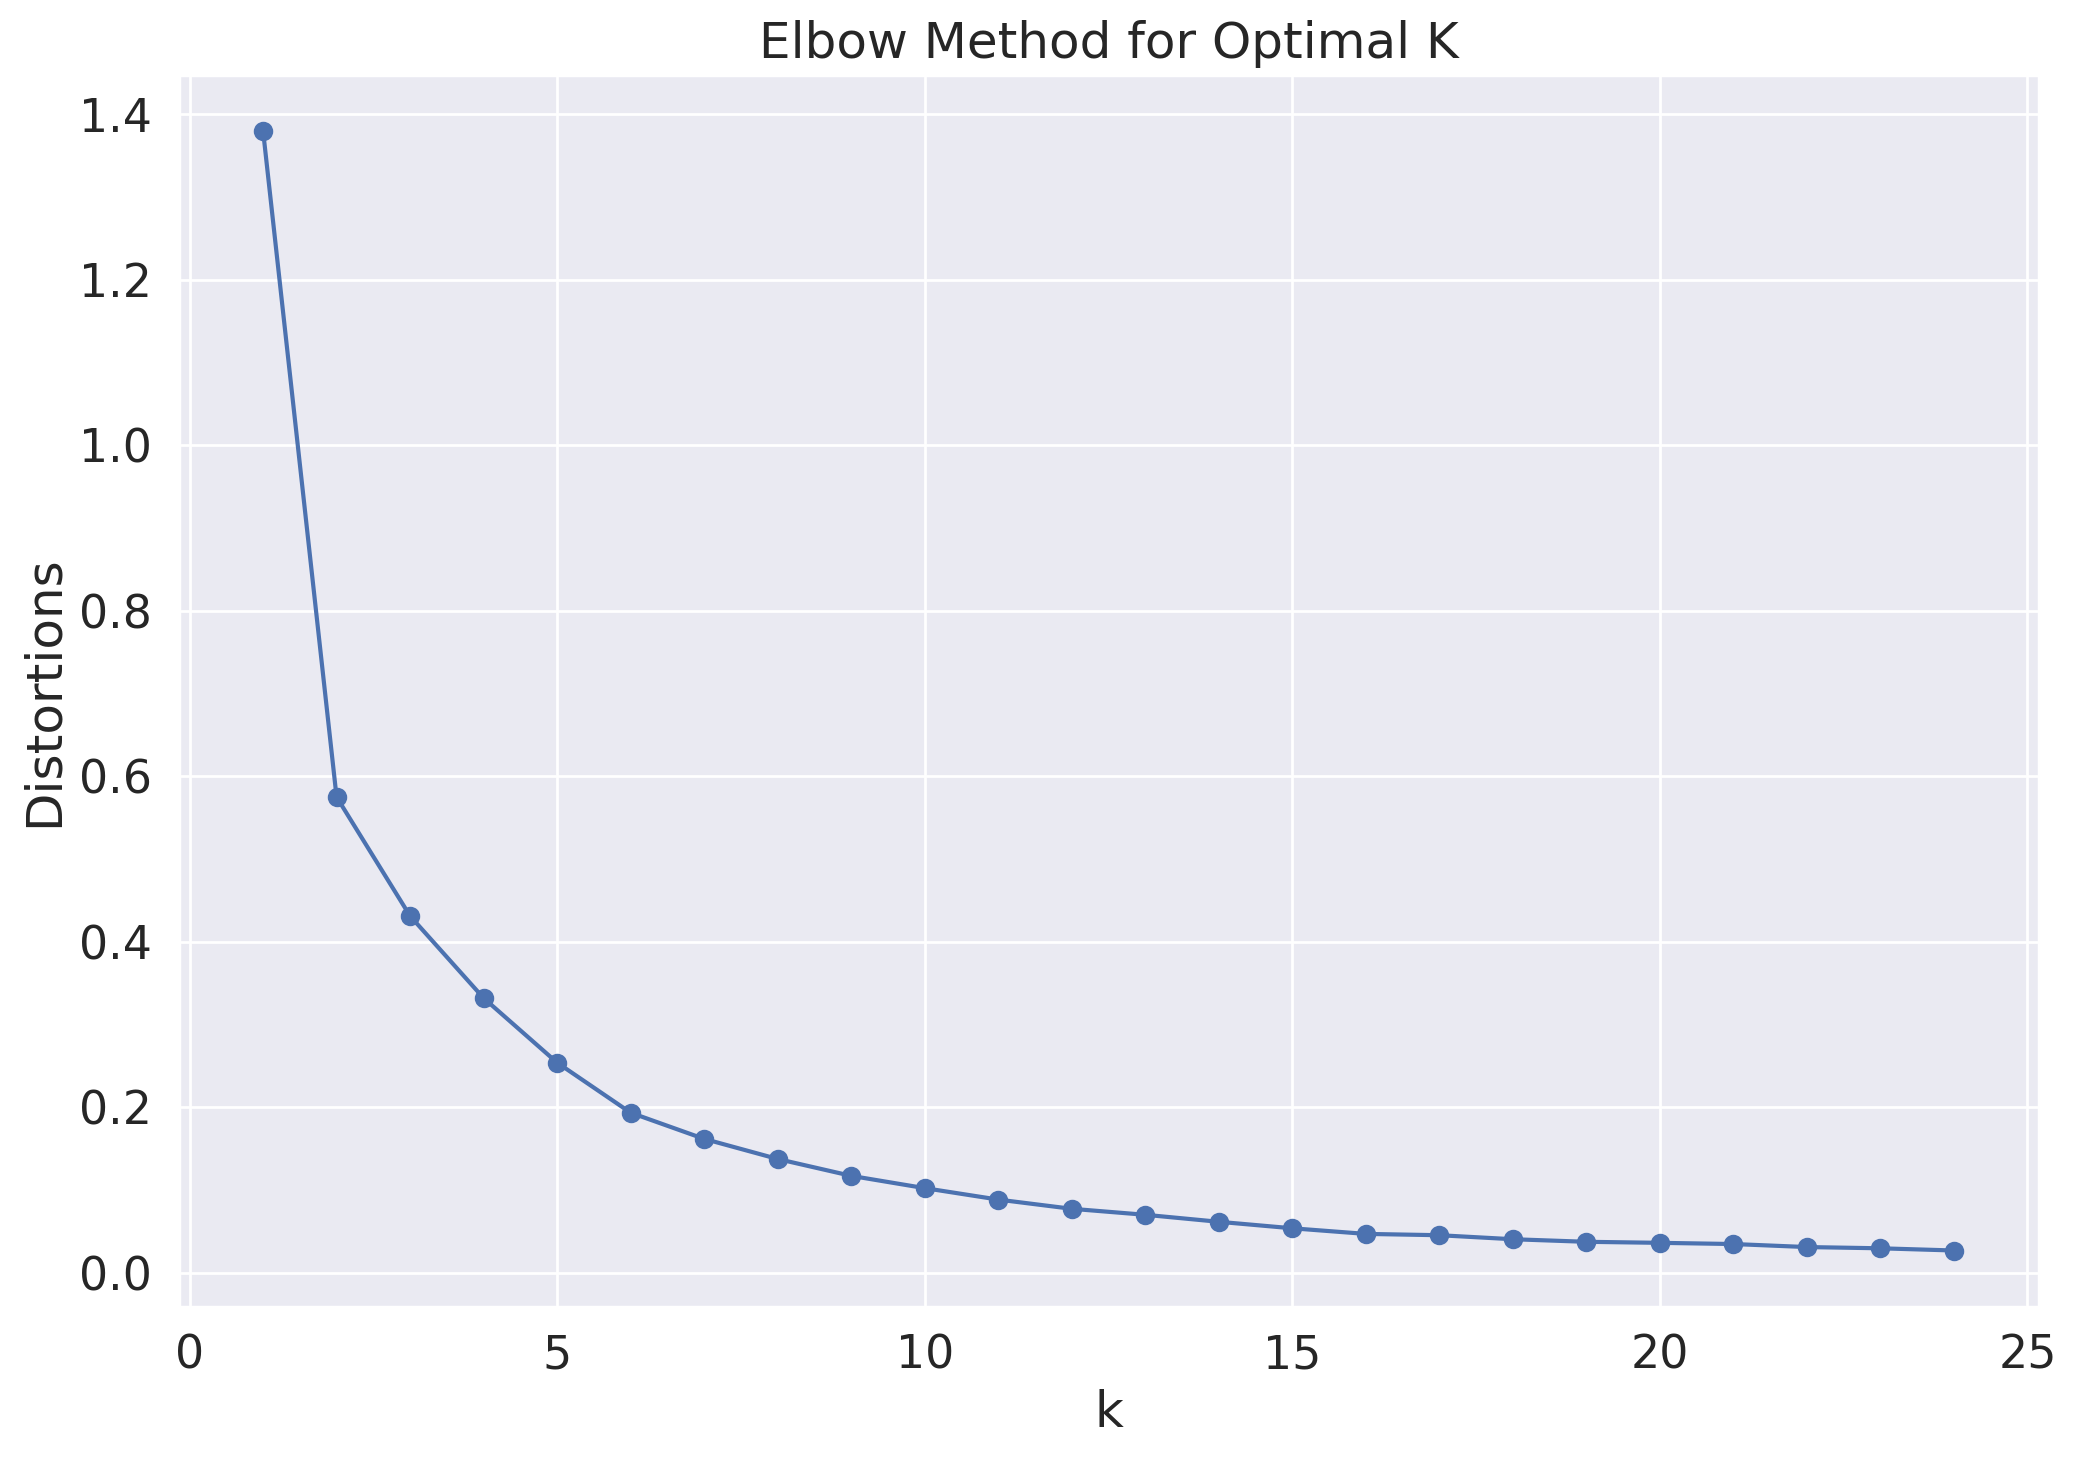

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.plot(K, distortions, marker = "o")
plt.xlabel("k")
plt.ylabel("Distortions")
plt.title("Elbow Method for Optimal K")
plt.savefig("elbow.png")
plt.show()

### Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = "euclidean"))

In [ ]:
sil

[0.587199056835846,
 0.4995854159587866,
 0.5161011675091177,
 0.47652122180178647,
 0.4819305983659915,
 0.48041364518778806,
 0.4973288230106026,
 0.5048913603577841,
 0.48592934899056783,
 0.49520430319827713,
 0.4976520499974935,
 0.5044541321409669,
 0.5114193477704947,
 0.5132207113055441,
 0.519910235939885,
 0.5226954418941636,
 0.5129181287793059,
 0.5255632086854678,
 0.5217214943936709,
 0.4964166425861278,
 0.5062975114813637,
 0.49142645047991157,
 0.5069304794103949,
 0.5099811684251793,
 0.5125664393003874,
 0.513951981762063,
 0.5241083763856677,
 0.5080440944617893,
 0.46868229022464236,
 0.46744538083450266,
 0.49401083204737717,
 0.4701952689238657,
 0.4799720943815472,
 0.5139396387702824,
 0.4842187351211976,
 0.5333781989232128,
 0.49308919993400274,
 0.49160562093552407,
 0.4922575598595388,
 0.5028735397549072,
 0.5036591602496645,
 0.5051946521523111,
 0.49997139365559046,
 0.5077881685522018,
 0.5245995971243694,
 0.5099241699451273,
 0.5220979790050423,
 0.52

### Back to K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters = 5, init = "k-means++")
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", "silhouette_score", silhouette_score(coords, y, metric = "euclidean"))

k = 5 silhouette_score 0.47480615973321944


In [ ]:
newOrleans["cluster"] = kmeans.predict(newOrleans[["longitude", "latitude"]])
newOrleans.head()

<ipython-input-126-cd66a1f47596>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants,cluster
60,Si6LXSR9gvAbmgO5DzV2cw,Lafitte's Landing Seafood House,1700 Lapalco Blvd,Harvey,LA,70058,29.875482,-90.049380,2.5,38,0,"{'WiFi': ''no'', 'RestaurantsReservations': 'T...","Restaurants, Soup, Seafood, Burgers","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",True,3
87,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,1001 Poydras St,New Orleans,LA,70112,29.950647,-90.074427,4.5,350,1,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Nightlife, Pubs, Event Planning & Services, Wi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",True,0
103,TLZ3-eDPLhUzfsWO4ad6Ug,Mahony's Po-Boys & Seafood,901 Iberville St,New Orleans,LA,70112,29.955415,-90.070062,4.0,382,1,"{'RestaurantsGoodForGroups': 'True', 'DogsAllo...","Restaurants, Seafood, Cajun/Creole","{'Monday': '0:0-0:0', 'Thursday': '15:0-20:0',...",True,0
131,FRYkg_JvsWU9xIXZsEZcVA,Altamura,2127 Prytania St,New Orleans,LA,70115,29.933388,-90.079498,3.5,27,0,"{'Alcohol': ''full_bar'', 'OutdoorSeating': 'T...","Cocktail Bars, Italian, Nightlife, Seafood, Ba...","{'Monday': '17:0-22:0', 'Wednesday': '17:0-22:...",True,0
189,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ...",True,3


In [ ]:
px.scatter_mapbox(newOrleans, lat = "latitude", lon = "longitude", color = "cluster", size = "review_count", hover_data = ["name", "latitude", "longitude"], zoom = 15, width = 1200, height = 800)

### Location-Based Recommendation

In [ ]:
top_restaurants_newOrleans = newOrleans.sort_values(by = ["review_count", "stars"], ascending = False)
top_restaurants_newOrleans.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Restaurants,cluster
4497,GBTPC53ZrG1ZBY3DT8Mbcw,Luke,333 Saint Charles Ave,New Orleans,LA,70130,29.950742,-90.070416,4.0,4554,1,"{'RestaurantsReservations': 'True', 'Restauran...","German, Restaurants, Seafood, Cocktail Bars, F...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",True,0
5851,vN6v8m4DO45Z4pp8yxxF_w,Surrey's Café & Juice Bar,1418 Magazine St,New Orleans,LA,70130,29.935799,-90.071906,4.5,2084,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Vegetarian, Restaurants, Breakfast & Brunch, C...","{'Monday': '8:0-15:0', 'Thursday': '8:0-15:0',...",True,0
957,W4ZEKkva9HpAdZG88juwyQ,Mr. B's Bistro,201 Royal St,New Orleans,LA,70130,29.954387,-90.068363,4.0,2064,1,"{'NoiseLevel': 'u'average'', 'RestaurantsReser...","Bars, Breakfast & Brunch, Restaurants, Barbequ...","{'Wednesday': '11:30-20:0', 'Thursday': '11:30...",True,0
1971,8uF-bhJFgT4Tn6DTb27viA,District Donuts Sliders Brew,2209 Magazine St,New Orleans,LA,70130,29.929426,-90.077069,4.5,2062,1,"{'RestaurantsPriceRange2': '1', 'RestaurantsRe...","Food, Donuts, Burgers, American (Traditional),...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ...",True,0
4639,g04aAvgol7IW8buqSbT4xA,Cafe Fleur De Lis,307 Chartres St,New Orleans,LA,70116,29.954494,-90.066592,4.0,1865,1,"{'RestaurantsReservations': 'False', 'Alcohol'...","Breakfast & Brunch, Coffee & Tea, Food, Restau...","{'Monday': '7:0-13:0', 'Tuesday': '7:0-13:0', ...",True,0


In [ ]:
# recommendation function that takes user's latitude and longitude as parameters
def recommend_restaurants(df, longitude, latitude):
  # Predict the cluster for longitude and latitude provided
  cluster = kmeans.predict(np.array([longitude, latitude]).reshape(1,-1))[0]
  print(cluster)

  # Get the best restaurant in this cluster
  return df[df["cluster"] == cluster].iloc[0:5][["name", "latitude", "longitude"]]

In [ ]:
# test 1
recommend_restaurants(top_restaurants_newOrleans, -115.1891691, 36.1017316)

2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
7371,Harbor Seafood & Oyster Bar,30.014592,-90.240317
2440,Dots Diner - Williams Blvd.,29.997378,-90.241623
5826,Cafe Du Monde,30.004609,-90.188018
7349,Casa Garcia Mexican Restaurant,30.004713,-90.224017
9158,Carrabba's Italian Grill,30.005981,-90.187652


In [ ]:
# test 2
recommend_restaurants(top_restaurants_newOrleans, -115.2798544, 36.0842838)

2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



,name,latitude,longitude
7371,Harbor Seafood & Oyster Bar,30.014592,-90.240317
2440,Dots Diner - Williams Blvd.,29.997378,-90.241623
5826,Cafe Du Monde,30.004609,-90.188018
7349,Casa Garcia Mexican Restaurant,30.004713,-90.224017
9158,Carrabba's Italian Grill,30.005981,-90.187652


### Creating User Profile

In [ ]:
test_coordinates = {
    "user": [1,2,3],
    "latitude": [29.9511, 29.9584, 29.8515],
    "longitude": [-90.2623, -90.0644, -90.0171]
}

test_df = pd.DataFrame(test_coordinates)
test_df

,user,latitude,longitude
0,1,29.9511,-90.2623
1,2,29.9584,-90.0644
2,3,29.8515,-90.0171


User 1

In [ ]:
user1 = test_df[test_df["user"] == 1]
user1

,user,latitude,longitude
0,1,29.9511,-90.2623


In [ ]:
fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_newOrleans, user1.longitude, user1.latitude), lat = "latitude", lon = "longitude", hover_data = ["name", "latitude", "longitude"], zoom = 15, width = 1200, height = 800)
fig.add_scattermapbox(lat = user1["latitude"], lon = user1["longitude"]).update_traces(dict(mode = "markers", marker = dict(size = 15)))

2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



User 2

In [ ]:
user2 = test_df[test_df["user"] == 2].reset_index()
fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_newOrleans, user2.longitude, user2.latitude), lat = "latitude", lon = "longitude", hover_data = ["name", "latitude", "longitude"], zoom = 15, width = 1200, height = 800)
fig.add_scattermapbox(lat = user2["latitude"], lon = user2["longitude"]).update_traces(dict(mode = "markers", marker = dict(size = 15)))

0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



User 3

In [ ]:
user3 = test_df[test_df["user"] == 3].reset_index()
fig = px.scatter_mapbox(recommend_restaurants(top_restaurants_newOrleans, user3.longitude, user3.latitude), lat = "latitude", lon = "longitude", hover_data = ["name", "latitude", "longitude"], zoom = 15, width = 1200, height = 800)
fig.add_scattermapbox(lat = user3["latitude"], lon = user3["longitude"]).update_traces(dict(mode = "markers", marker = dict(size = 15)))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



3


# Glossary

**Transformers**: A type of neural network architecture used for natural language processing tasks, consisting of a series of layers that transform input data into output data. Transformers were introduced in the paper "Attention Is All You Need" by Vaswani et al. (2017) and have since been widely used in natural language processing tasks due to their ability to handle sequential data and long-term dependencies. \\

**Encoders**: A component of transformer-based models that processes the input data and produces a series of hidden representations that are passed to the decoder. Encoders are responsible for capturing the input sequence's contextual information and creating a representation that can be used by the decoder to generate the output sequence. \\

**Tokenization:** The process of converting text into a sequence of tokens or words, which can then be used as input for machine learning models. Tokenization is a critical step in natural language processing tasks as it transforms unstructured data into structured data that can be used by machine learning models. \\

**Autotokenizer:** A tool used in natural language processing that converts text into a sequence of tokens or words, which can then be used as input for machine learning models. Autokenizers are critical in tokenization, a process that transforms unstructured data into structured data that can be used by machine learning models. \\

**Optimizer:** A type of algorithm used in machine learning to optimize the parameters of a model. Optimizers are used to improve the performance of the model by minimizing the loss function. \\

**Learning rate scheduler:** A technique used in machine learning to adjust the learning rate of the optimizer during training. Learning rate schedulers are used to improve the performance of the model by adjusting the learning rate based on the progress of training. \\

**Loss function:** A function used in machine learning to measure the difference between the predicted output of a model and the actual output. Loss functions are used to optimize the parameters of the model during training. \\

**Epochs:** A unit of measurement in machine learning that refers to the number of times the entire training dataset is passed through the model during training. \\

**Batch size:** The number of training samples fed to the model at once during training. \\

**Validation loss:** A measure of the difference between the predicted output of a model and the actual output on the validation dataset. Validation loss is used to monitor the performance of the model during training. \\

**Validation accuracy:** A measure of the accuracy of the model on the validation dataset. Validation accuracy is used to monitor the performance of the model during training. \\

**BertForSequenceClassification:** A transformer-based model developed by Google for natural language processing tasks such as sentiment analysis and question-answering. BertForSequenceClassification is a pre-trained model that can be fine-tuned for a specific task using a smaller, task-specific dataset. \\

**Transfer Learning:** A technique used in machine learning in which a model that has been trained on one task is fine-tuned for a different task. \\

**Loss Function:** In machine learning, a loss function is a function that measures the difference between the predicted output of a model and the actual output. The loss function is used to optimize the parameters of the model during training. The goal of training is to minimize the loss function, which means reducing the difference between the predicted output and the actual output. Different types of loss functions are used for different types of tasks and types of output, and the choice of loss function depends on the specific task and the type of output that the model is expected to produce. \\

- The pre-trained BERT model uses a masked language modeling (MLM) loss function during its pre-training phase. In MLM, the model is trained to predict a masked word or token in a sentence given the surrounding context. This loss function allows the model to learn contextual information from the input sequence. \\

- During fine-tuning, the BERT model can use different types of loss functions depending on the downstream task. For example, for a sentiment analysis task, the BERT model can use a cross-entropy loss function to measure the difference between the predicted sentiment label and the actual label. The choice of loss function depends on the specific task and the type of output that the model is expected to produce. \\

**BERT:** Bidirectional Encoder Representations from Transformers, a pre-trained transformer-based model developed by Google for natural language processing tasks. BERT was introduced in the paper "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Devlin et al. (2018) and has since been used in various natural language processing tasks such as sentiment analysis, question-answering, and language translation. \\

- **Pre-trained Model:** A machine learning model that has been trained on a large dataset and can be fine-tuned for a specific task using a smaller, task-specific dataset. Pre-trained models are widely used in natural language processing tasks as they can significantly reduce the computation and time required to train a model from scratch. \\
- **Fine-tuning:** The process of taking a pre-trained model and adapting it to a new, specific task by training it on a smaller, task-specific dataset. Fine-tuning is a critical step in natural language processing tasks as it allows the model to adapt to the specific task and improve its performance.
- **Tokenization:** The process of converting text into a sequence of tokens or words, which can then be used as input for machine learning models. Tokenization is a critical step in natural language processing tasks as it transforms unstructured data into structured data that can be used by machine learning models. \\
- **Masked Language Modeling:** A task in which the model is trained to predict a masked word or token in a sentence given the surrounding context. Masked language modeling is a critical component of BERT's pre-training process and allows the model to learn contextual information from the input sequence. \\
- **Next Sentence Prediction:** A task in which the model is trained to predict whether two sentences are consecutive or not. Next sentence prediction is another critical component of BERT's pre-training process and allows the model to learn the relationship between sentences in a document. \\

**Attention Mechanism**: A mechanism used in transformer-based models to selectively attend to certain parts of the input sequence while ignoring others. Attention is used to improve the model's performance by focusing on the relevant parts of the input sequence and ignoring the irrelevant parts. \\
- **Attention Masking:** A technique used in transformer-based models to selectively attend to certain parts of the input sequence while ignoring others. Attention masking is used to improve the model's performance by focusing on the relevant parts of the input sequence and ignoring the irrelevant parts. \\
- **Padding:** A technique used to ensure that all input sequences have the same length by adding zeros or other tokens to the end of shorter sequences.
- **Truncating:** A technique used to ensure that all input sequences have the same length by removing tokens from the end of longer sequences. \\
- **Positional Encoding:** A technique used to incorporate the position of each token in the input sequence into the model's representation of the sequence. \\


**Sentiment Analysis**: The use of natural language processing techniques to identify and extract subjective information from text, such as attitudes, opinions, and emotions. Sentiment analysis is a critical task in the field of natural language processing as it is used to understand people's opinions and attitudes towards various topics, products, or services. \\

- **Subjectivity Analysis:** The task of identifying whether a piece of text expresses subjective or objective information. Subjectivity analysis is a critical component of sentiment analysis as it helps determine whether a piece of text contains opinions, attitudes, or emotions. \\
- **Opinion Mining:** The task of identifying and extracting opinions from text. Opinion mining is a critical component of sentiment analysis as it helps determine the overall sentiment of a piece of text. \\
- **Emotion Detection:** The task of identifying and extracting emotions from text. Emotion detection is a critical component of sentiment analysis as it helps determine the emotional impact of a piece of text. \\
- **Aspect-Based Sentiment Analysis:** The task of identifying the sentiment of specific aspects or features of a product, service, or topic. Aspect-based sentiment analysis is a critical component of sentiment analysis as it provides a more detailed understanding of people's opinions and attitudes towards specific aspects of a product or topic. \\
 
**Restaurant Recommendation System:** A system that uses machine learning algorithms to suggest restaurants to users based on their preferences, location, and past behavior. Restaurant recommendation systems are widely used in the food industry to provide personalized recommendations to customers and improve their overall experience. \\

- **K-means Clustering:** A type of unsupervised machine learning algorithm used to partition a dataset into K clusters. The algorithm works by iteratively assigning each data point to the nearest cluster centroid and then updating the centroids based on the mean of the data points in the cluster. K-means clustering is widely used in various fields, including image analysis, natural language processing, and customer segmentation. \\

- **Silhouette Score:** A metric used to evaluate the quality of clustering in K-means clustering. The silhouette score is calculated based on the distance between the data points within a cluster and the distance between the data points in different clusters. A higher silhouette score indicates that the data points are well-clustered and that the clusters are distinct from one another. \\

